In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the csv files 
df_dprecip=pd.read_csv('/content/Daily Precipitation.csv')
df_dsm=pd.read_csv('/content/Daily Soil Mositure.csv')
df_dt=pd.read_csv('/content/Daily Temperature.csv')
df_pq=pd.read_csv('/content/Production Quantity.csv')
df_NDVI=pd.read_csv('/content/Eight Day NDVI.csv')
df_pred=pd.read_csv('/content/predicted_production_qty.csv')

In [ ]:
#coverting the start_date to date_time columns
df_dprecip.start_date=pd.to_datetime(df_dprecip.start_date)
df_dsm.start_date=pd.to_datetime(df_dsm.start_date)
df_dt.start_date=pd.to_datetime(df_dt.start_date)
df_NDVI.start_date=pd.to_datetime(df_NDVI.start_date)
df_pq.start_date=pd.to_datetime(df_pq.start_date)
df_pq.end_date=pd.to_datetime(df_pq.end_date)

In [ ]:
#setting the dataframe index as start_date
df_dprecip.set_index("start_date", inplace =True)
df_dsm.set_index("start_date", inplace =True)
df_dt.set_index("start_date", inplace =True)
df_NDVI.set_index("start_date", inplace =True)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# EDA

As the given production data is for each month in each region I want to convert the values of the temp, precip, ndvi, smos to monthly for each region so that I can train the model which has all monthly data.

First I would like to see the distribution of temp, precip, ndvi, smos with respect to each month, so that I can know to choose between mean and median for each parameter when I compress the data into each month.

{1: 25.63149147581815, 2: 26.684344635976082, 3: 27.617695638147037, 4: 27.42582948664294, 5: 26.651033910810053, 6: 26.356092581614483, 7: 26.25585806332327, 8: 26.437581479118474, 9: 26.84163105968767, 10: 26.8581308254533, 11: 25.52849343818965, 12: 25.298340684722568}
{1: 25.5663177892686, 2: 26.5382861935421, 3: 27.5261310496, 4: 27.4061968734266, 5: 26.8665260806915, 6: 26.52991048017845, 7: 26.4560071713871, 8: 26.5684935721473, 9: 27.024611915171953, 10: 26.945176779607, 11: 25.62451263521555, 12: 25.340338627915152}


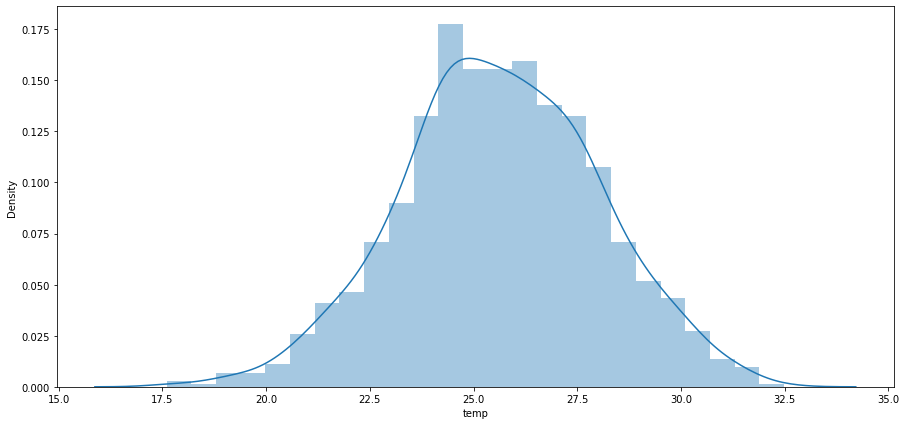

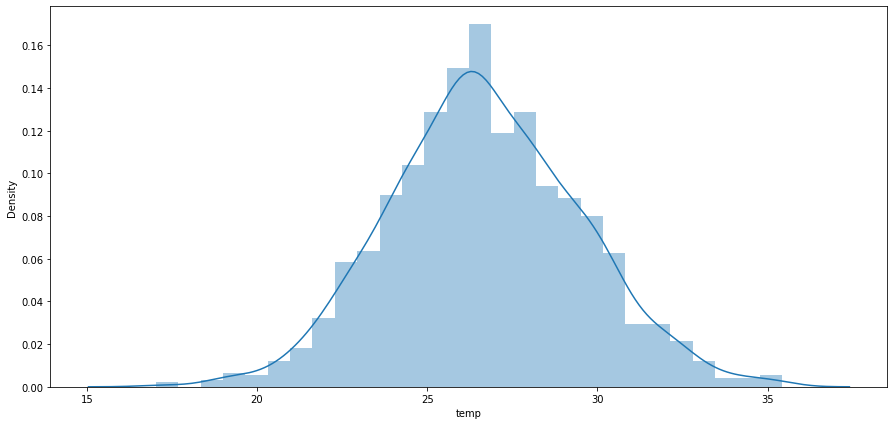

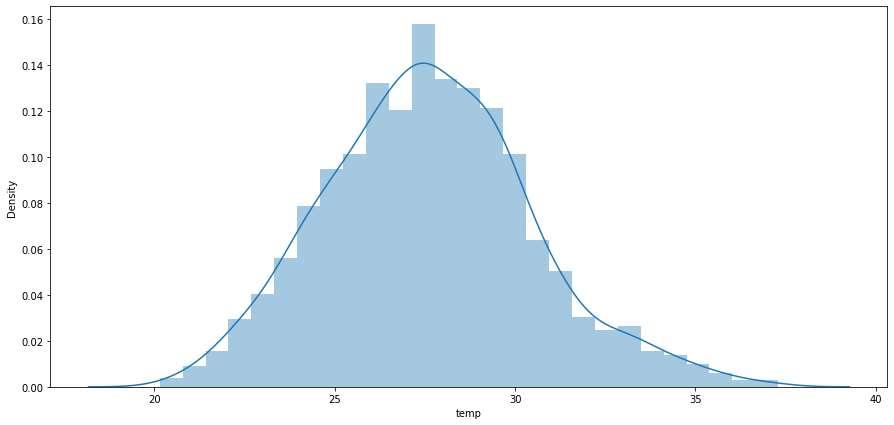

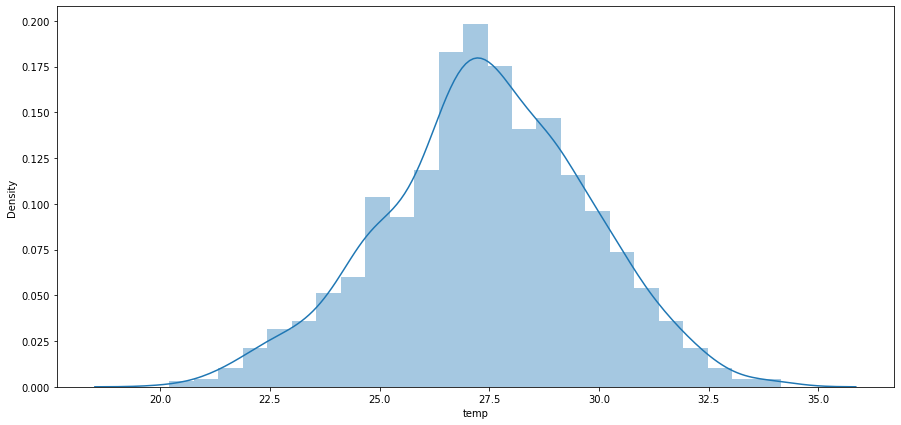

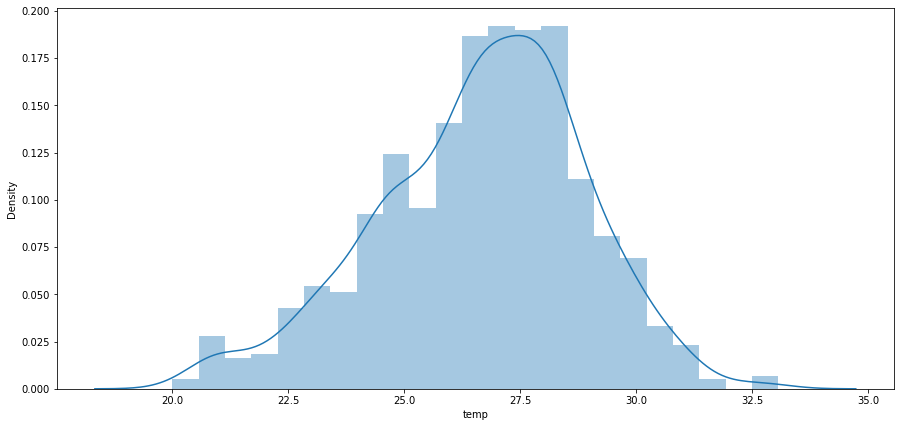

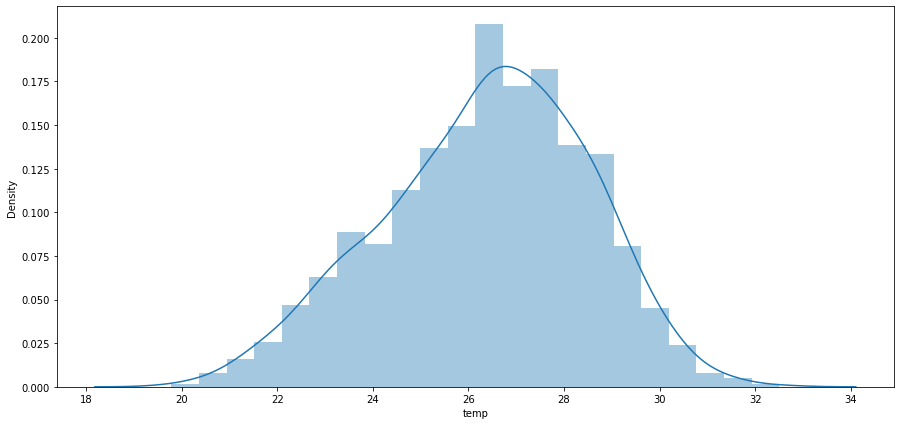

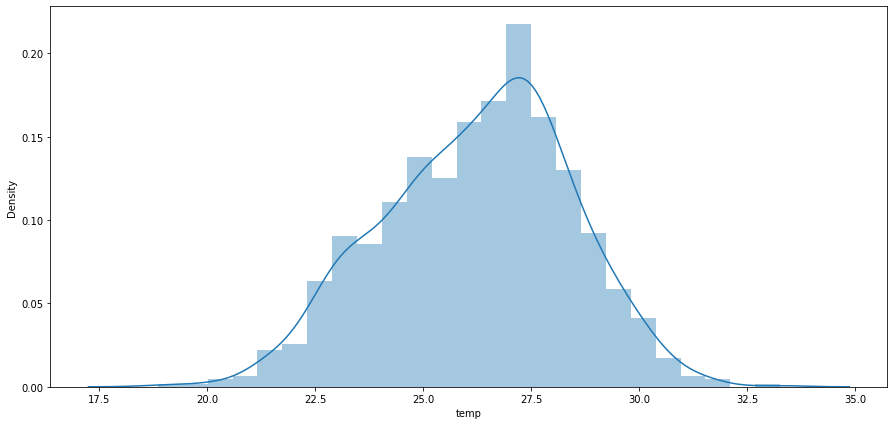

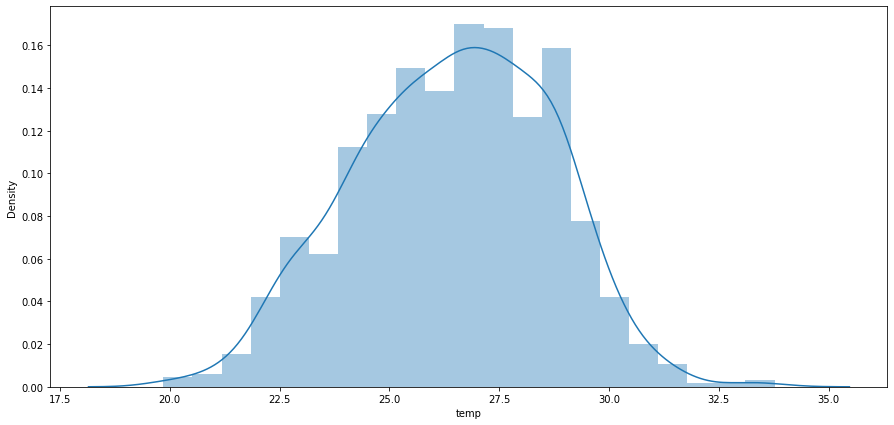

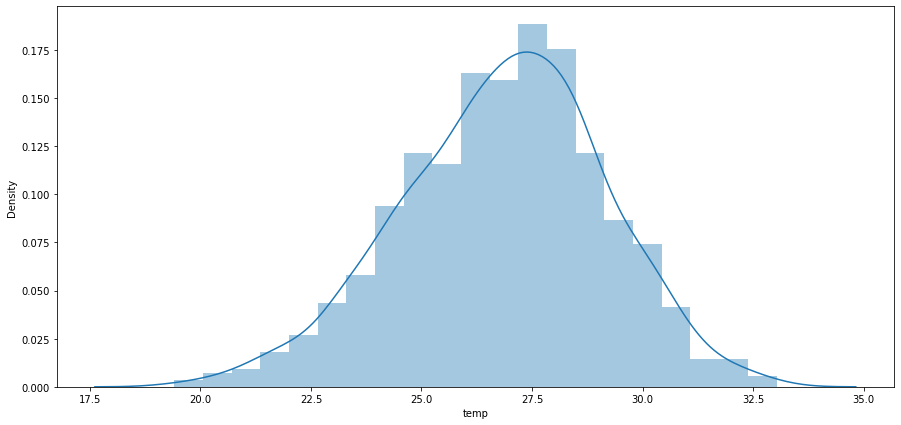

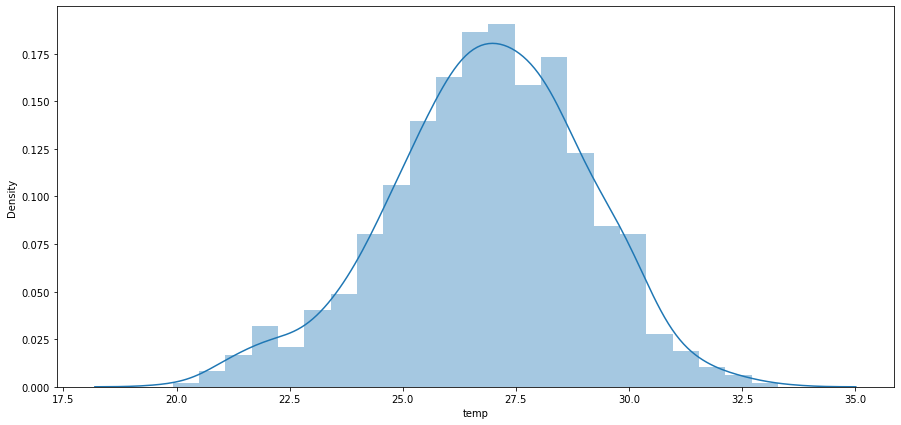

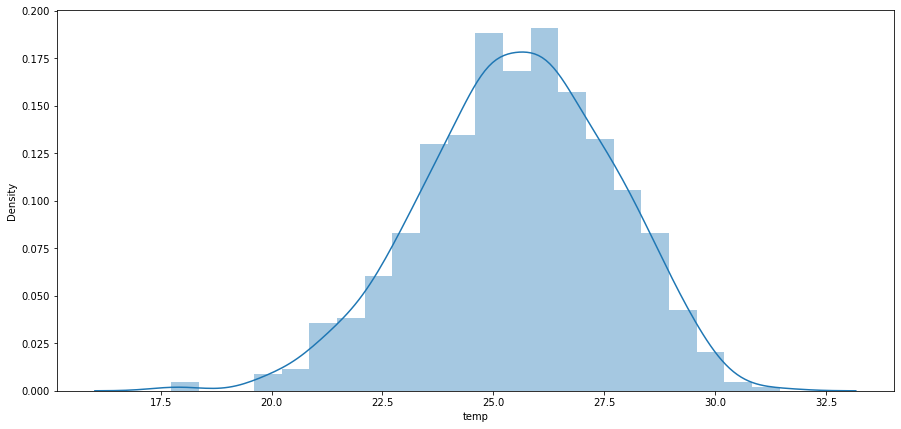

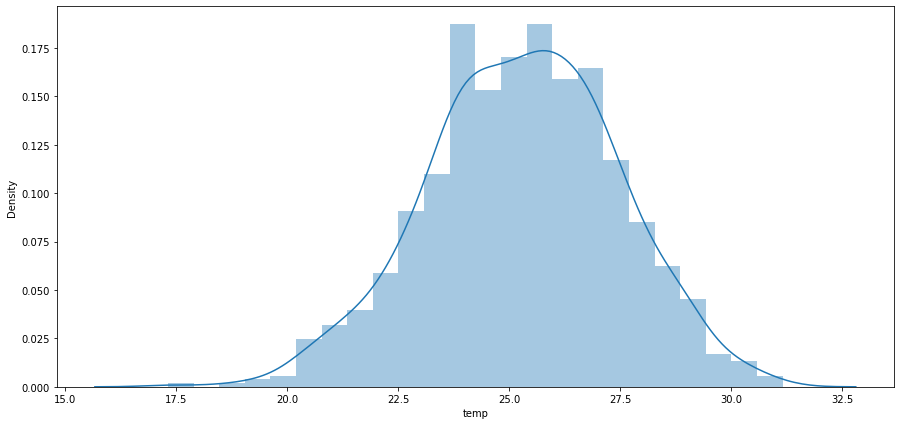

In [ ]:
#checking the dist of temp monthly
l1={}
l2={}
for i in df_dt.index.month.unique():
  l1[i]=df_dt.temp[(df_dt.index.month==i)].mean()
  l2[i]=df_dt.temp[(df_dt.index.month==i)].median()
  plt.figure(figsize=(15, 7))
  sns.distplot(df_dt.temp[(df_dt.index.month==i)])
print(l1)
print(l2)

{1: 5.784376605647515, 2: 4.02076377178215, 3: 5.519864698055936, 4: 8.250813748980404, 5: 9.422328402613601, 6: 6.3374717403479535, 7: 5.8447588653917055, 8: 6.234874562566585, 9: 7.63983553593779, 10: 8.680877325743612, 11: 10.915314570621321, 12: 9.146553566315148}
{1: 1.60873266890784, 2: 0.5991012075866795, 3: 1.9150256118201452, 4: 5.58133240764397, 5: 7.04801914968377, 6: 4.22698386023023, 7: 3.5390401012370853, 8: 4.21780605560132, 9: 5.66770877403484, 10: 6.657578506308935, 11: 8.028890902014044, 12: 4.397328231614095}


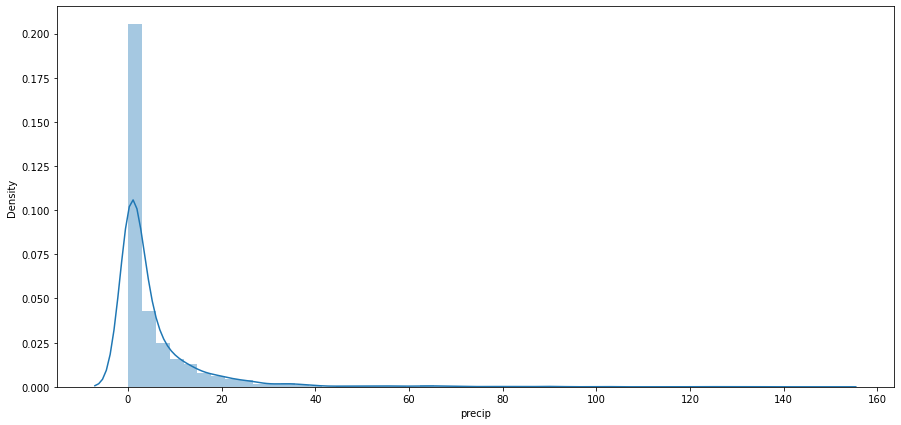

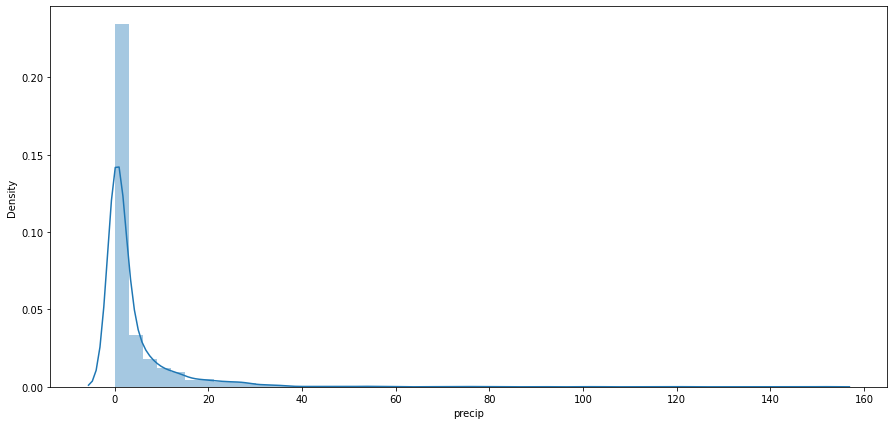

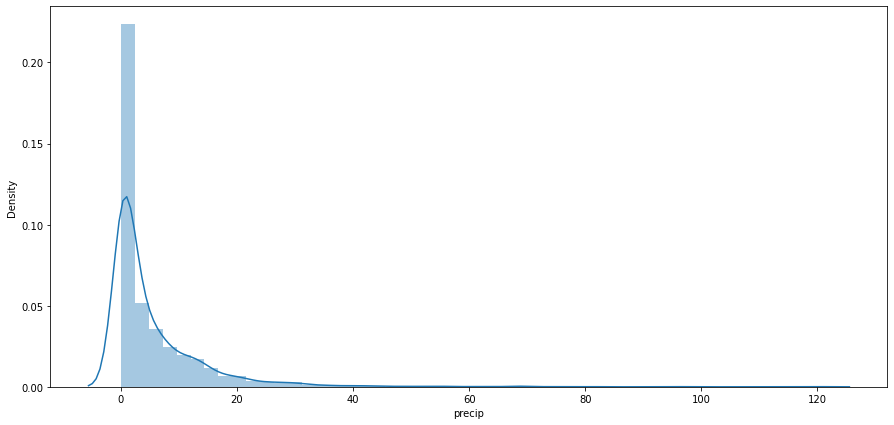

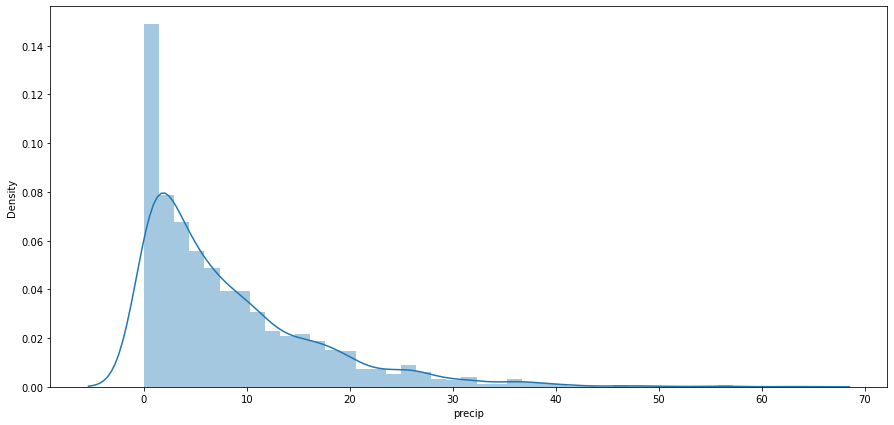

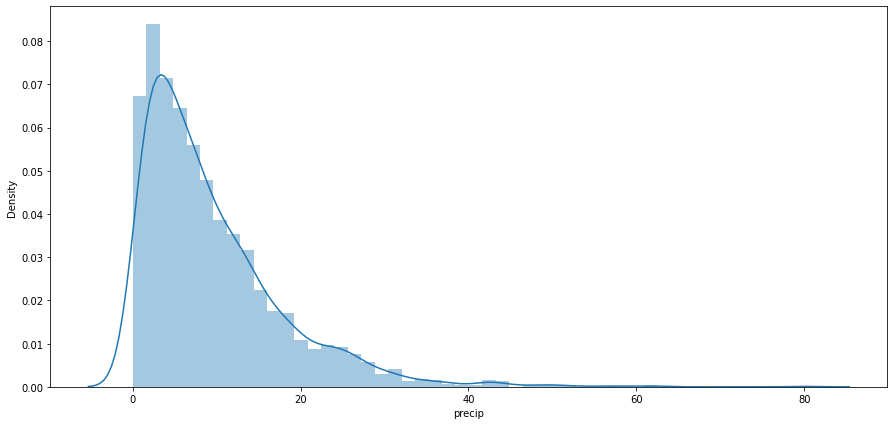

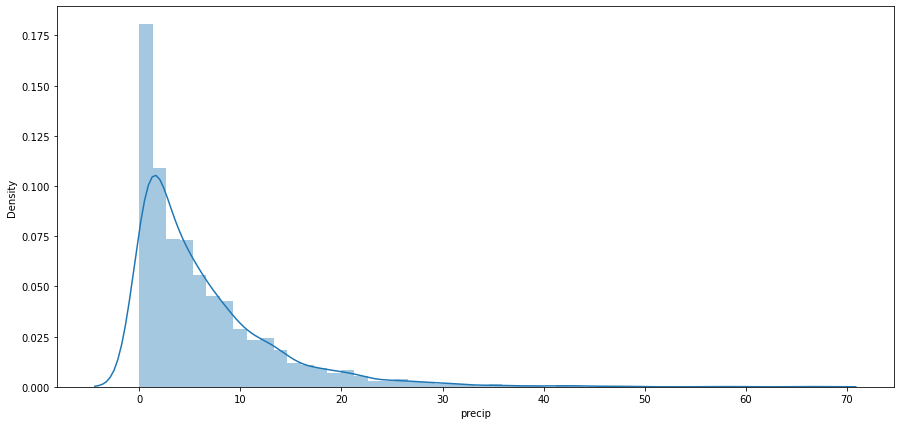

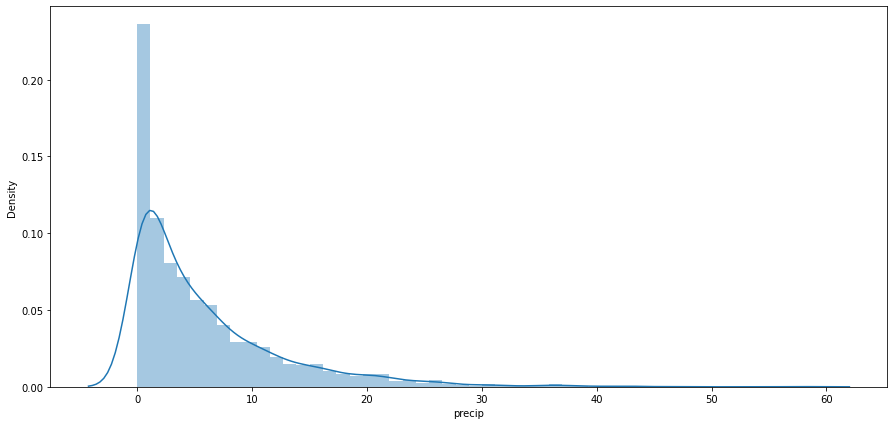

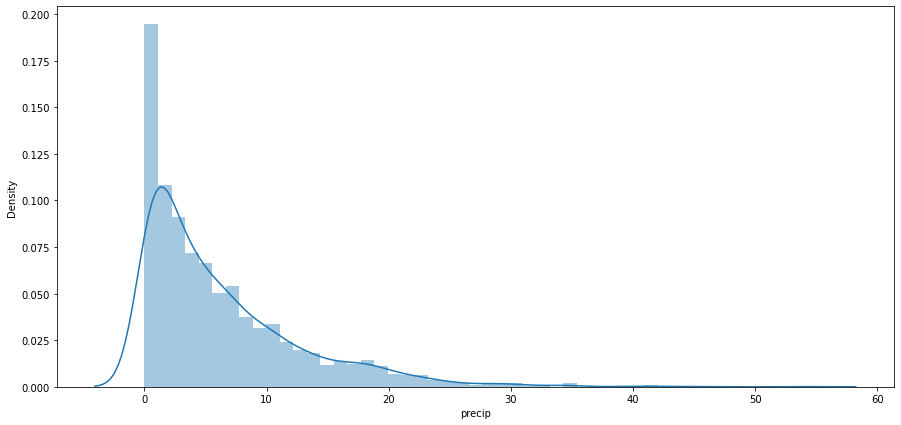

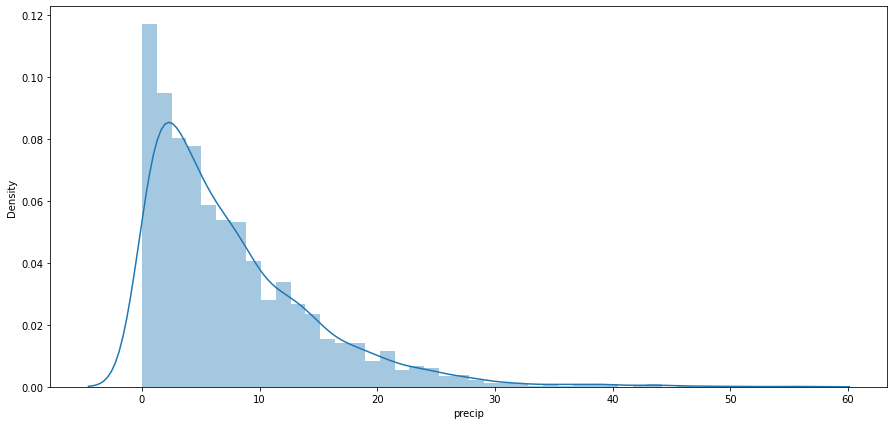

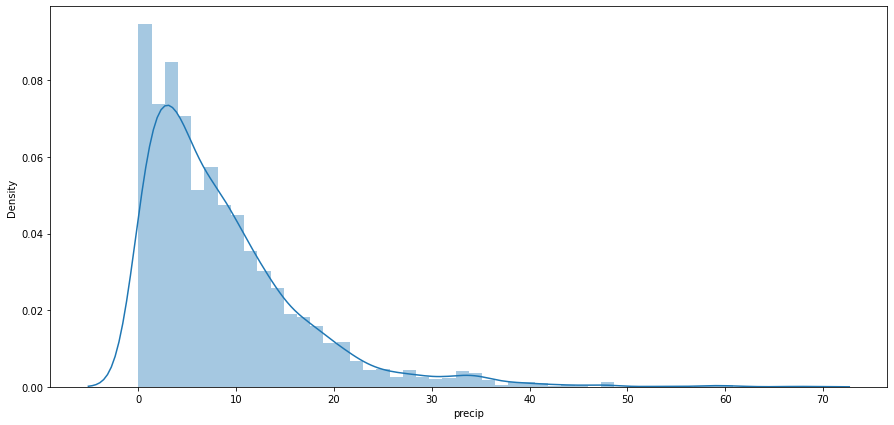

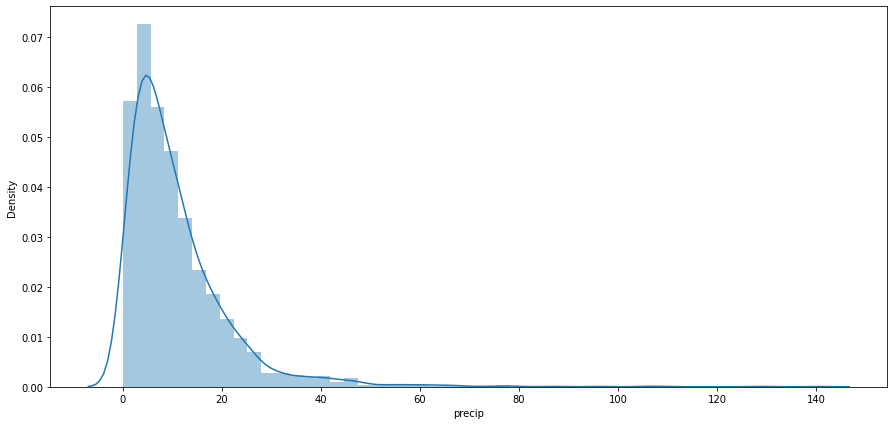

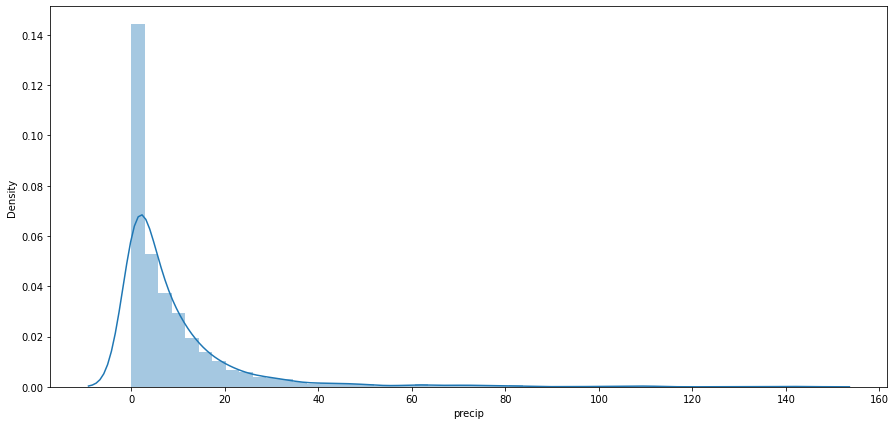

In [ ]:
#checking the dist of precip monthly
p1={}
p2={}
for i in df_dt.index.month.unique():
  p1[i]=df_dprecip.precip[(df_dprecip.index.month==i)].mean()
  p2[i]=df_dprecip.precip[(df_dprecip.index.month==i)].median()
  plt.figure(figsize=(15, 7))
  sns.distplot(df_dprecip.precip[(df_dprecip.index.month==i)])
print(p1)
print(p2)

{12: 0.795969655506338, 1: 0.7920664656819054, 2: 0.7814355240258556, 3: 0.7766752247156196, 4: 0.7923144685612394, 5: 0.810680563353173, 6: 0.8155108699380591, 7: 0.8134198563409702, 8: 0.8080688259230492, 9: 0.8000939205574179, 10: 0.7988171237304703, 11: 0.7987198482721416}
{12: 0.80379074191, 1: 0.7967965635699145, 2: 0.789050700349293, 3: 0.784170103514211, 4: 0.7994809618050001, 5: 0.814734761270233, 6: 0.8201730035610935, 7: 0.815962065971026, 8: 0.811308502795069, 9: 0.8076898752057624, 10: 0.8060818632099636, 11: 0.8068846157177625}


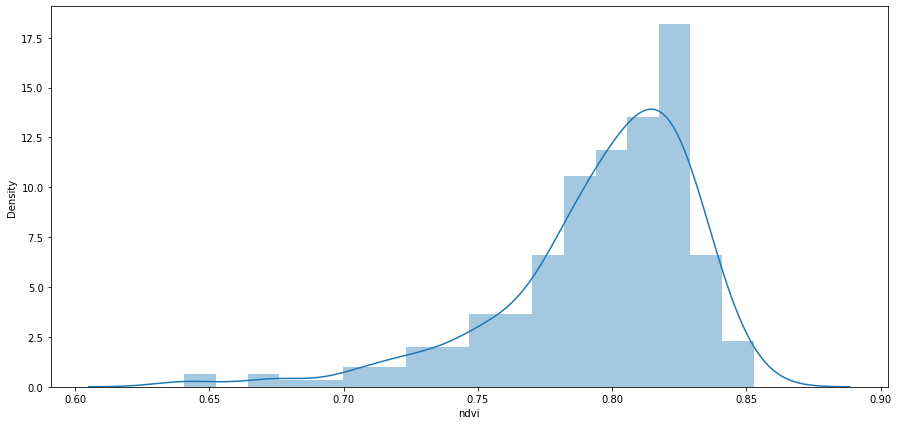

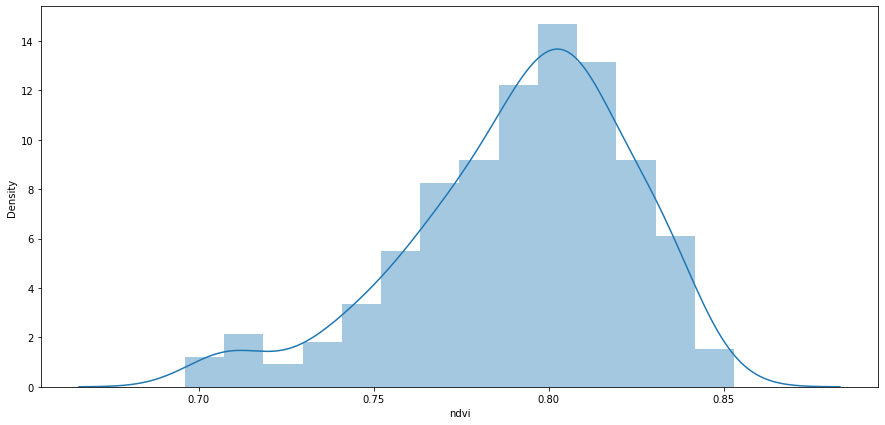

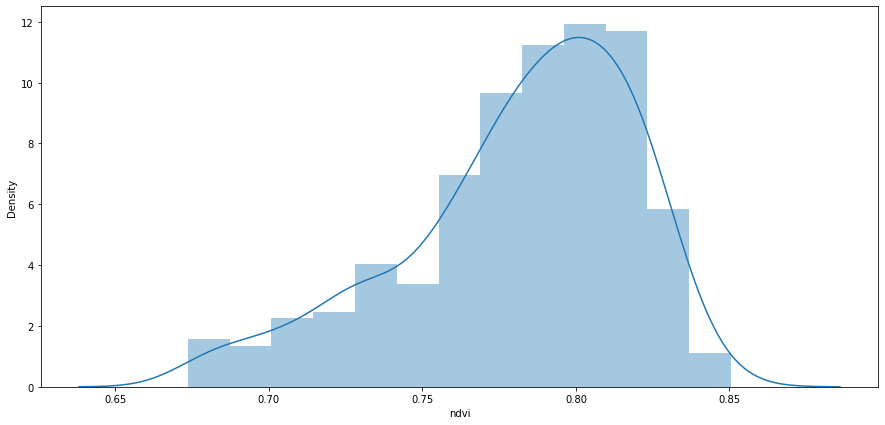

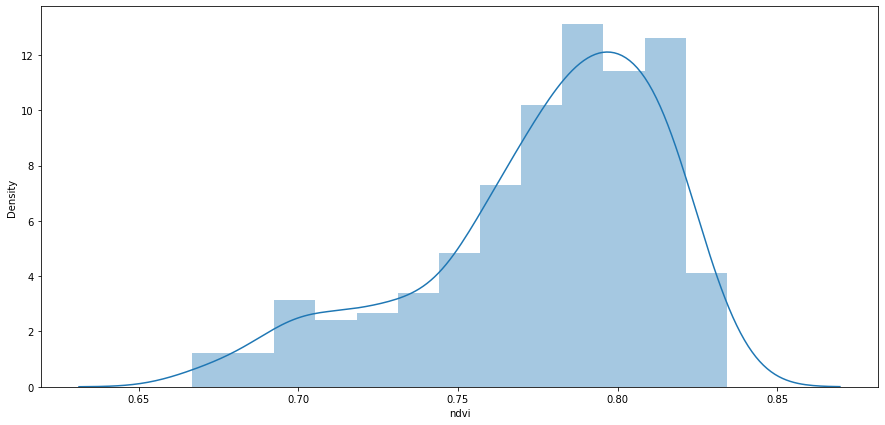

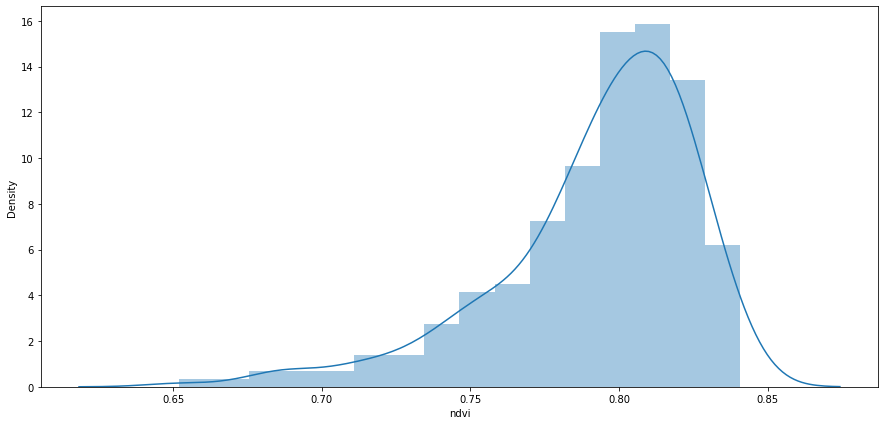

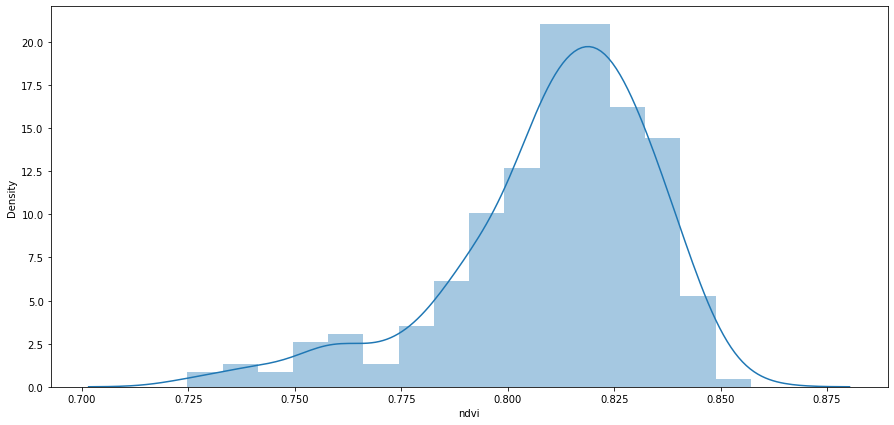

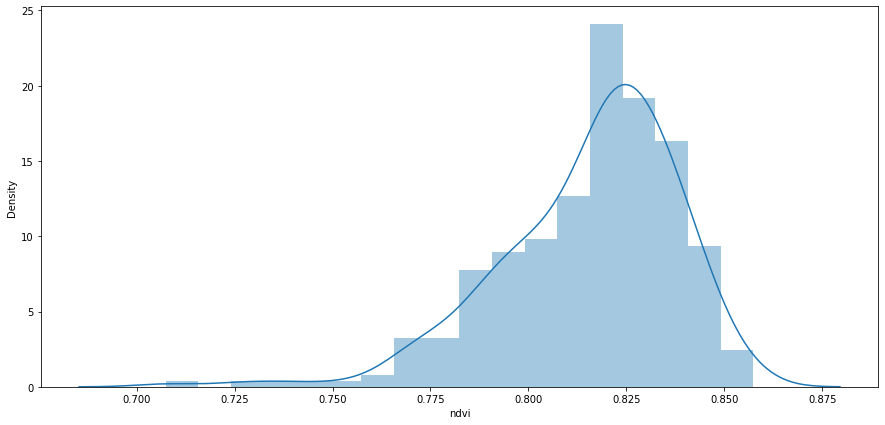

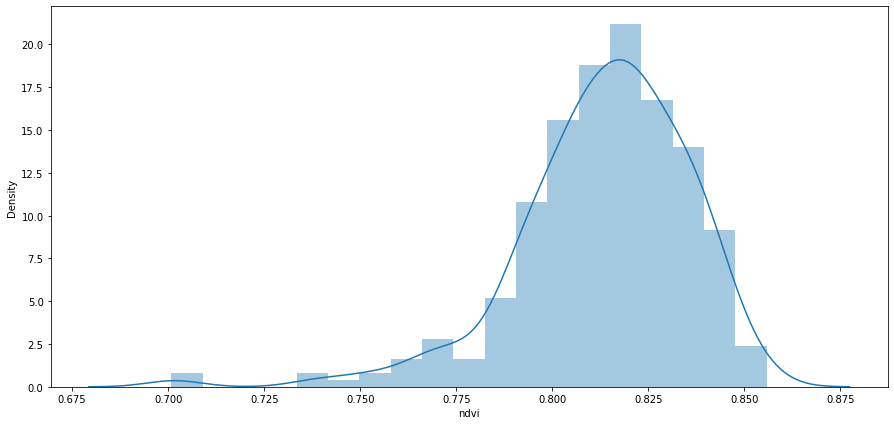

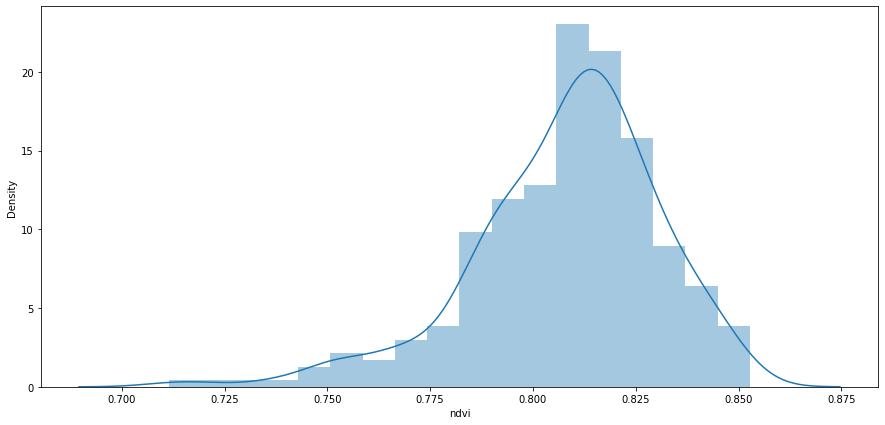

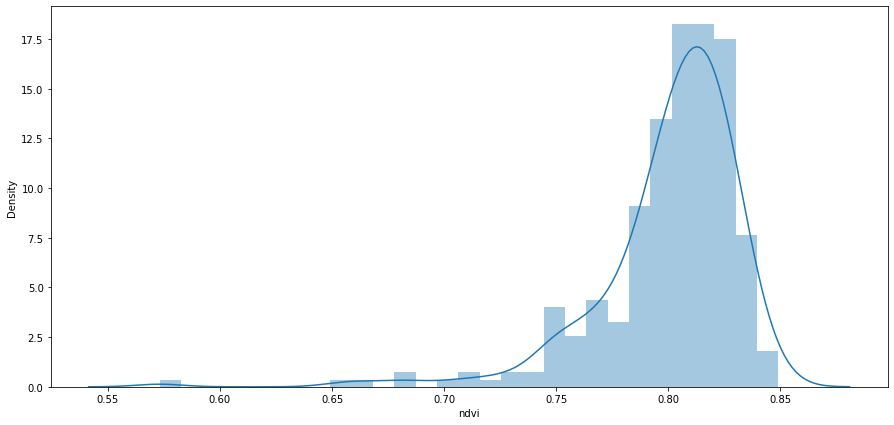

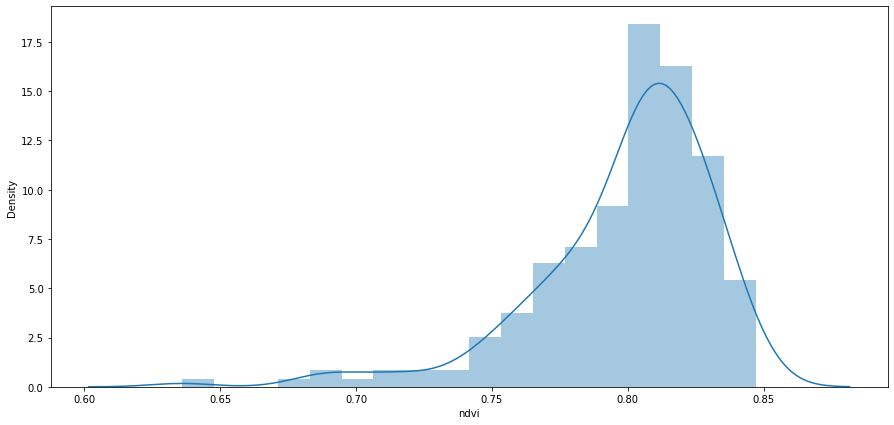

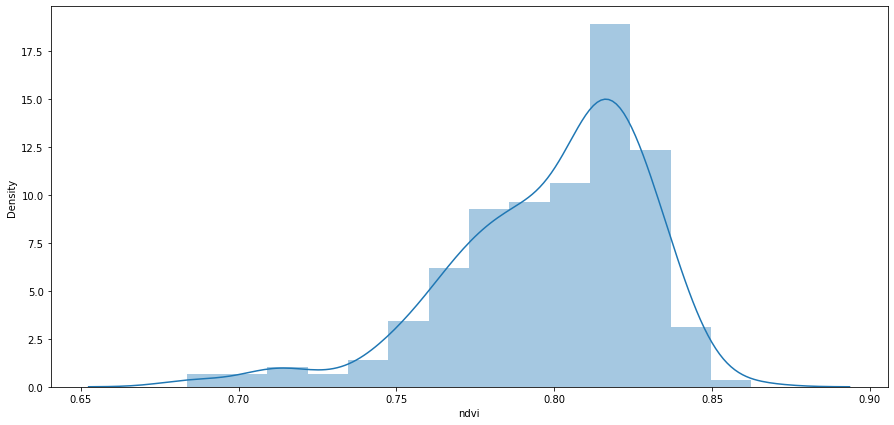

In [ ]:
#checking the dist of ndvi monthly
n1={}
n2={}
for i in df_NDVI.index.month.unique():
  n1[i]=df_NDVI.ndvi[(df_NDVI.index.month==i)].mean()
  n2[i]=df_NDVI.ndvi[(df_NDVI.index.month==i)].median()
  plt.figure(figsize=(15, 7))
  sns.distplot(df_NDVI.ndvi[(df_NDVI.index.month==i)])
print(n1)
print(n2)

{1: 0.2963641788368893, 2: 0.28025698211301364, 3: 0.2551955918830811, 4: 0.23698989814542415, 5: 0.2455476986871937, 6: 0.25543290586839584, 7: 0.24096458971531293, 8: 0.24242942692534894, 9: 0.2580472465929484, 10: 0.2706647282907367, 11: 0.3062088023376243, 12: 0.3059346375258561}
{1: 0.292595047466337, 2: 0.275407638743517, 3: 0.251952860074773, 4: 0.233102190966438, 5: 0.238578597982881, 6: 0.247776130957926, 7: 0.2336236047033315, 8: 0.23642136515521, 9: 0.25038816415272, 10: 0.26567120673927, 11: 0.299474555921532, 12: 0.300429661733179}


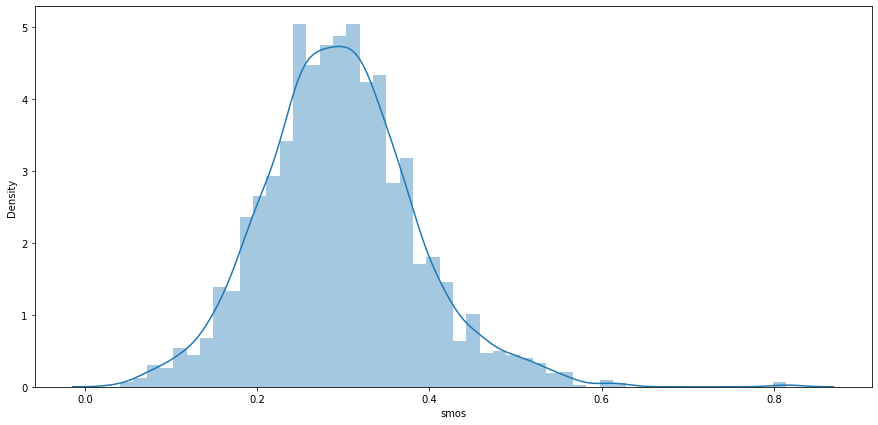

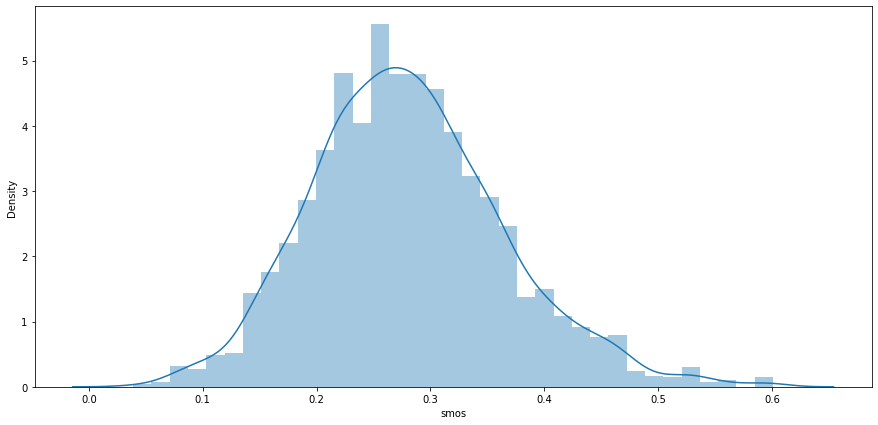

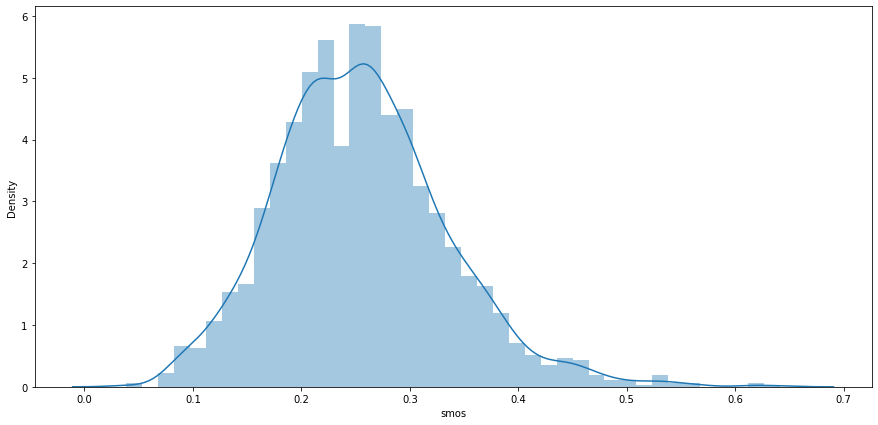

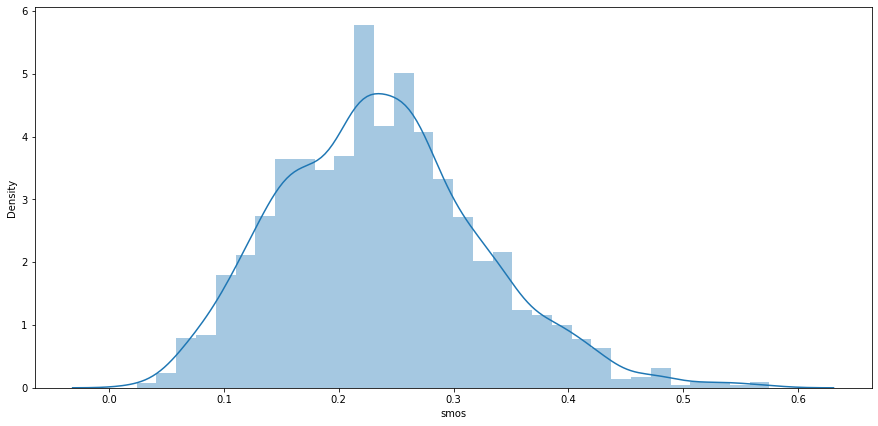

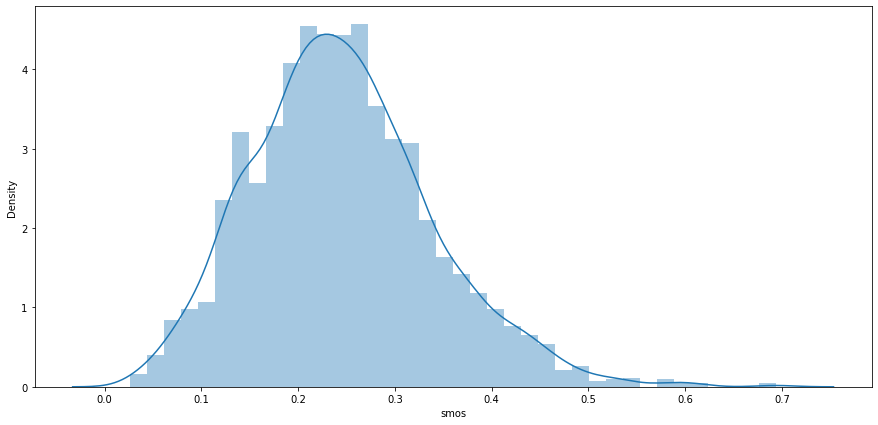

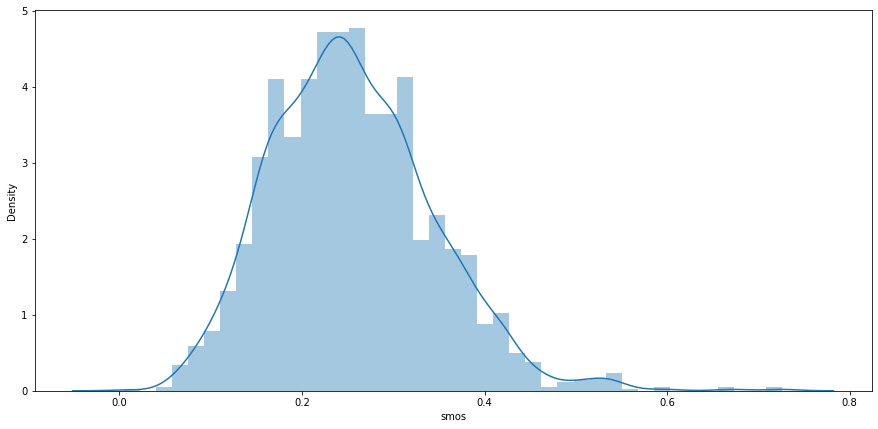

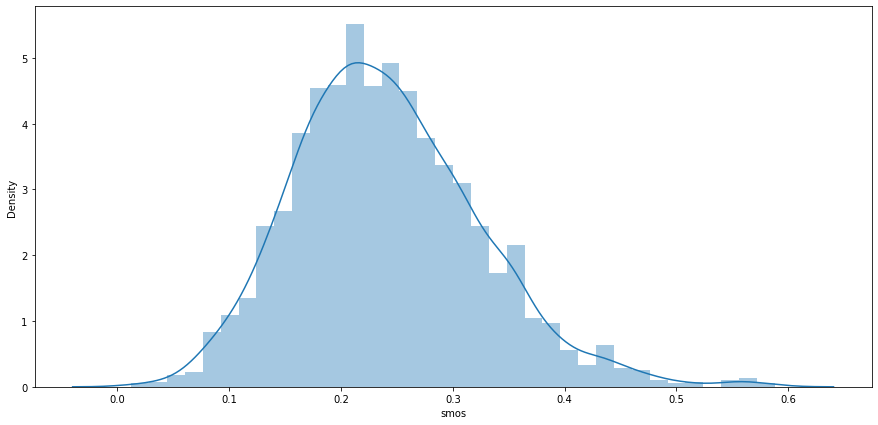

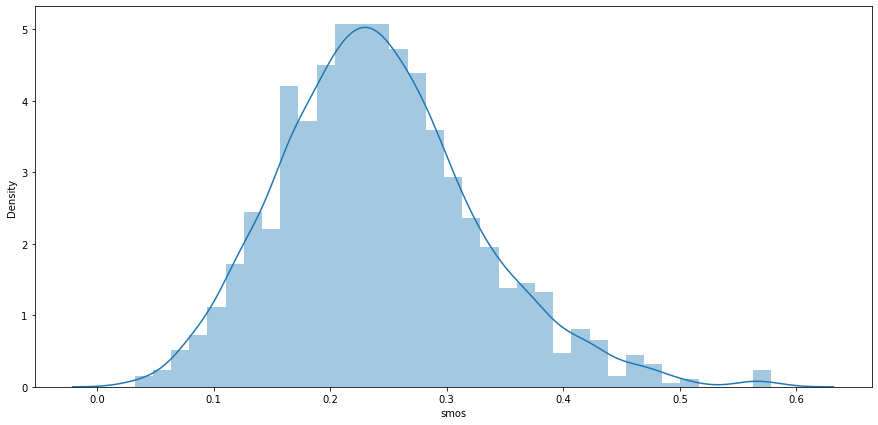

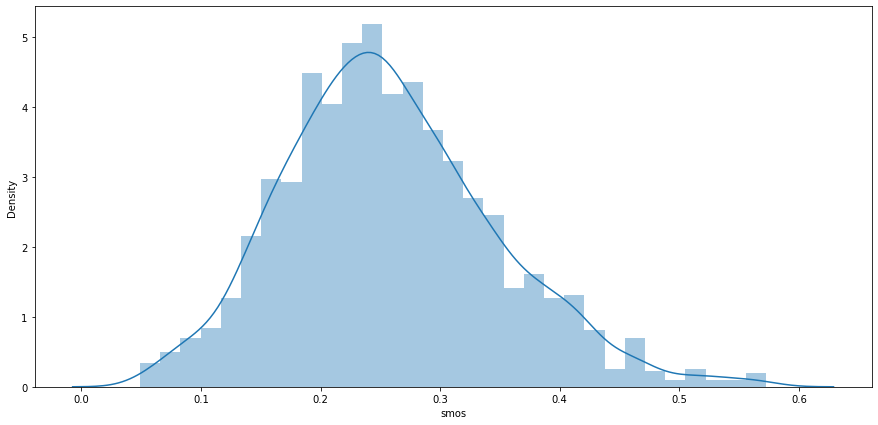

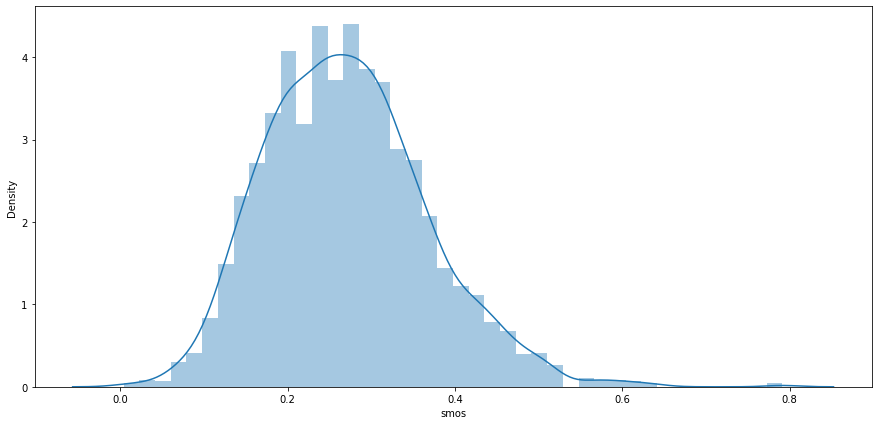

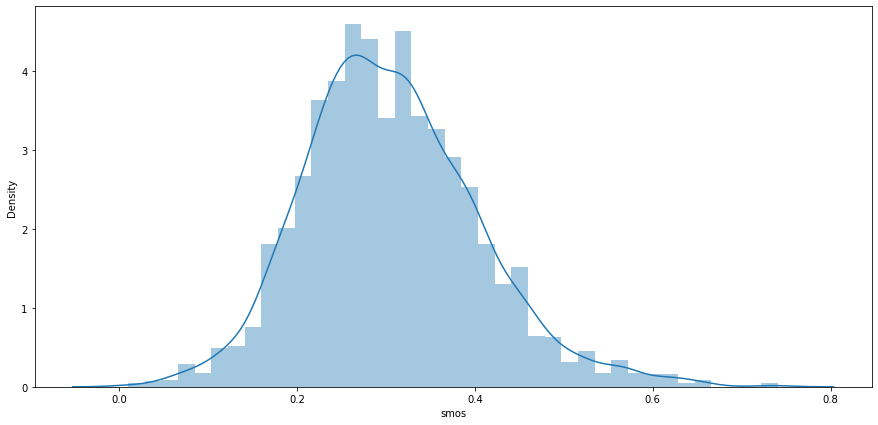

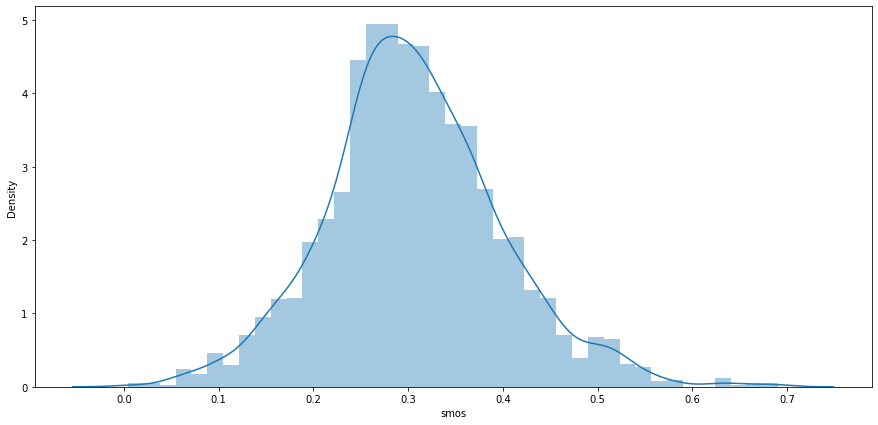

In [ ]:
#checking the dist of smos monthly
s1={}
s2={}
for i in df_dsm.index.month.unique():
  s1[i]=df_dsm.smos[(df_dsm.index.month==i)].mean()
  s2[i]=df_dsm.smos[(df_dsm.index.month==i)].median()
  plt.figure(figsize=(15, 7))
  sns.distplot(df_dsm.smos[(df_dsm.index.month==i)])
print(s1)
print(s2)

Observing the plots we can see that the precip & ndvi are a skewed so I am conidering the median value of each month and temp & smos I am considering the mean values as they are close to normal.

# Data Preparation

In [ ]:
# Getting the mean values of temp for each month and region 
l=df_dt['region_id'].unique()
df_dt_new=pd.DataFrame()
for i in l:
    a=pd.DataFrame(df_dt.temp[(df_dt['region_id']==i)].resample(rule='M').mean())
    a['region_id']=df_dt.region_id[(df_dt['region_id']==i)].resample(rule='M').min()
    df_dt_new=pd.concat([df_dt_new,a])
df_dt_new

,temp,region_id
start_date,,
2014-01-31 00:00:00+00:00,25.482158,93
2014-02-28 00:00:00+00:00,26.647786,93
2014-03-31 00:00:00+00:00,29.379089,93
2014-04-30 00:00:00+00:00,26.267849,93
2014-05-31 00:00:00+00:00,26.642768,93
...,...,...
2021-11-30 00:00:00+00:00,25.322988,105
2021-12-31 00:00:00+00:00,24.857478,105
2022-01-31 00:00:00+00:00,25.019782,105


In [ ]:
# Considering only values from 2015 to 2020 as the production data given is in these years
df_dt_new.drop(df_dt_new[(df_dt_new.index.year < 2015)|(df_dt_new.index.year > 2020)].index, inplace = True)
df_dt_new.reset_index(inplace=True)
df_dt_new.rename(columns={"start_date": "end_date"},inplace=True)

In [ ]:
#Merging the prod data and the temp data
df_fin=pd.merge(df_pq,df_dt_new,how="left",on=['end_date','region_id'])
df_fin

,start_date,end_date,prod,region_id,temp
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,25.003593
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,26.807568
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,26.954109
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,26.948865
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,25.405121
...,...,...,...,...,...
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,27.424585
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,27.940492
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,27.048770
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,24.715070


In [ ]:
#getting the monthly means of smos
m=df_dsm['region_id'].unique()
df_dsm_new=pd.DataFrame()
for i in m:
    b=pd.DataFrame(df_dsm.smos[(df_dsm['region_id']==i)].resample(rule='M').mean())
    b['region_id']=df_dsm.region_id[(df_dsm['region_id']==i)].resample(rule='M').min()
    df_dsm_new=pd.concat([df_dsm_new,b])
df_dsm_new

,smos,region_id
start_date,,
2014-01-31 00:00:00+00:00,0.287870,93
2014-02-28 00:00:00+00:00,0.272979,93
2014-03-31 00:00:00+00:00,0.254618,93
2014-04-30 00:00:00+00:00,0.277936,93
2014-05-31 00:00:00+00:00,0.238466,93
...,...,...
2021-11-30 00:00:00+00:00,0.397742,105
2021-12-31 00:00:00+00:00,0.431531,105
2022-01-31 00:00:00+00:00,0.419781,105


In [ ]:
#getting the data from 2015-2020
df_dsm_new.drop(df_dsm_new[(df_dsm_new.index.year < 2015)|(df_dsm_new.index.year > 2020)].index, inplace = True)
df_dsm_new.reset_index(inplace=True)
df_dsm_new.rename(columns={"start_date": "end_date"},inplace=True)

In [ ]:
#merging with the prod data
df_fin=pd.merge(df_fin,df_dsm_new,how="left",on=['end_date','region_id'])
df_fin

,start_date,end_date,prod,region_id,temp,smos
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,25.003593,0.318552
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,26.807568,0.291452
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,26.954109,0.251969
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,26.948865,0.248915
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,25.405121,0.280602
...,...,...,...,...,...,...
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,27.424585,0.225784
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,27.940492,0.277477
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,27.048770,0.277670
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,24.715070,0.302014


In [ ]:
#getting median monthly values of the precip
n=df_dprecip['region_id'].unique()
df_dprecip_new=pd.DataFrame()
for i in m:
    c=pd.DataFrame(df_dprecip.precip[(df_dprecip['region_id']==i)].resample(rule='M').median())
    c['region_id']=df_dprecip.region_id[(df_dprecip['region_id']==i)].resample(rule='M').min()
    df_dprecip_new=pd.concat([df_dprecip_new,c])
df_dprecip_new

,precip,region_id
start_date,,
2014-01-31 00:00:00+00:00,0.143766,93
2014-02-28 00:00:00+00:00,0.040576,93
2014-03-31 00:00:00+00:00,0.257755,93
2014-04-30 00:00:00+00:00,9.939460,93
2014-05-31 00:00:00+00:00,6.850647,93
...,...,...
2021-11-30 00:00:00+00:00,11.368894,105
2021-12-31 00:00:00+00:00,1.712301,105
2022-01-31 00:00:00+00:00,0.104612,105


In [ ]:
#getting values from 2015-202
df_dprecip_new.drop(df_dprecip_new[(df_dprecip_new.index.year < 2015)|(df_dprecip_new.index.year > 2020)].index, inplace = True)
df_dprecip_new.reset_index(inplace=True)
df_dprecip_new.rename(columns={"start_date": "end_date"},inplace=True)

In [ ]:
#merging with prod data
df_fin=pd.merge(df_fin,df_dprecip_new,how="left",on=['end_date','region_id'])
df_fin

,start_date,end_date,prod,region_id,temp,smos,precip
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,25.003593,0.318552,0.260547
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,26.807568,0.291452,0.150836
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,26.954109,0.251969,1.636423
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,26.948865,0.248915,9.357805
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,25.405121,0.280602,7.340673
...,...,...,...,...,...,...,...
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,27.424585,0.225784,4.442044
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,27.940492,0.277477,6.090986
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,27.048770,0.277670,7.131644
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,24.715070,0.302014,10.996202


In [ ]:
#getting monthly median values of ndvi
o=df_NDVI['region_id'].unique()
df_NDVI_new=pd.DataFrame()
for i in o:
    d=pd.DataFrame(df_NDVI.ndvi[(df_NDVI['region_id']==i)].resample(rule='M').median())
    d['region_id']=df_NDVI.region_id[(df_NDVI['region_id']==i)].resample(rule='M').min()
    df_NDVI_new=pd.concat([df_NDVI_new,d])
df_NDVI_new

,ndvi,region_id
start_date,,
2013-12-31 00:00:00+00:00,0.679106,93.0
2014-01-31 00:00:00+00:00,0.746270,93.0
2014-02-28 00:00:00+00:00,0.763540,93.0
2014-03-31 00:00:00+00:00,0.734051,93.0
2014-04-30 00:00:00+00:00,0.813054,93.0
...,...,...
2021-11-30 00:00:00+00:00,0.801214,105.0
2021-12-31 00:00:00+00:00,0.801862,105.0
2022-01-31 00:00:00+00:00,0.801571,105.0


In [ ]:
#getting values between 2015-2020
df_NDVI_new.drop(df_NDVI_new[(df_NDVI_new.index.year < 2015)|(df_NDVI_new.index.year > 2020)].index, inplace = True)
df_NDVI_new.reset_index(inplace=True)
df_NDVI_new.rename(columns={"start_date": "end_date"},inplace=True)

In [ ]:
#Identifying null values
r=df_NDVI_new[df_NDVI_new['ndvi'].isna()].index
r

Int64Index([238, 598, 670, 684], dtype='int64')

In [ ]:
#Filling the null values with the mean of the previous and next data. As mostly NAN's are for Nov and the ndvi for Nov is between 10 &12 months
for i in r:
  df_NDVI_new['ndvi'].iloc[i]=((df_NDVI_new.iloc[i-1].ndvi+df_NDVI_new.iloc[i+1].ndvi)/2)
  df_NDVI_new['region_id'].iloc[i]=((df_NDVI_new.iloc[i-1].region_id+df_NDVI_new.iloc[i+1].region_id)/2)

In [ ]:
#Adding the data to prod data
df_fin=pd.merge(df_fin,df_NDVI_new,how="left",on=['end_date','region_id'])
df_fin

,start_date,end_date,prod,region_id,temp,smos,precip,ndvi
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,25.003593,0.318552,0.260547,0.760691
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,26.807568,0.291452,0.150836,0.761635
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,26.954109,0.251969,1.636423,0.755956
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,26.948865,0.248915,9.357805,0.785057
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,25.405121,0.280602,7.340673,0.808383
...,...,...,...,...,...,...,...,...
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,27.424585,0.225784,4.442044,0.813537
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,27.940492,0.277477,6.090986,0.819784
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,27.048770,0.277670,7.131644,0.811309
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,24.715070,0.302014,10.996202,0.803192


We have obtained the final data set df_fin which we can train the model on

## Visualization of the prod with repect to the region and parameters

In [ ]:
df_plt=df_fin.copy(deep=True)
df_plt.set_index(['start_date'],inplace=True)
df_plt['month']=df_plt.index.month
df_plt['year']=df_plt.index.year

In [ ]:
nt=df_plt[(df_plt.region_id==93)]
nf=df_plt[(df_plt.region_id==94)]
nfi=df_plt[(df_plt.region_id==95)]
ns=df_plt[(df_plt.region_id==97)]
ne=df_plt[(df_plt.region_id==98)]
nn=df_plt[(df_plt.region_id==99)]
ot=df_plt[(df_plt.region_id==102)]
oth=df_plt[(df_plt.region_id==103)]
of=df_plt[(df_plt.region_id==104)]
ofi=df_plt[(df_plt.region_id==105)]

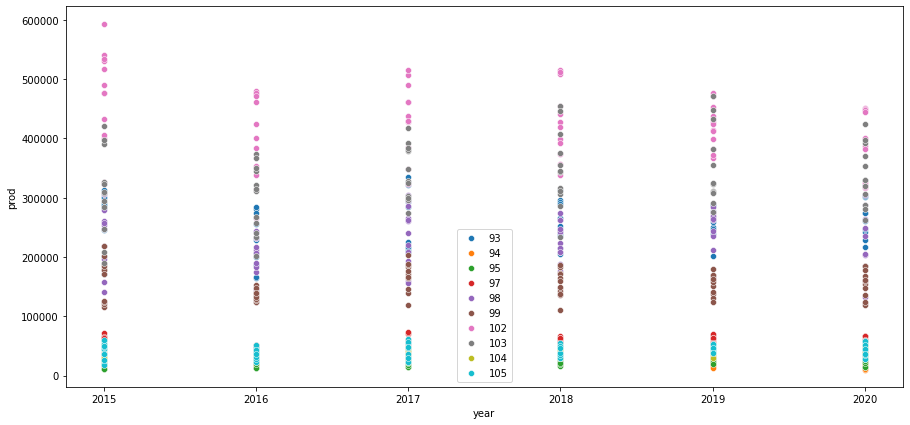

In [ ]:
#plot year vs prod
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.scatterplot(x='year', y='prod', data=nt)
sns.scatterplot(x='year', y='prod', data=nf)
sns.scatterplot(x='year', y='prod', data=nfi)
sns.scatterplot(x='year', y='prod', data=ns)
sns.scatterplot(x='year', y='prod', data=ne)
sns.scatterplot(x='year', y='prod', data=nn)
sns.scatterplot(x='year', y='prod', data=ot)
sns.scatterplot(x='year', y='prod', data=oth)
sns.scatterplot(x='year', y='prod', data=of)
sns.scatterplot(x='year', y='prod', data=ofi)
plt.legend(labels=df_plt.region_id.unique())

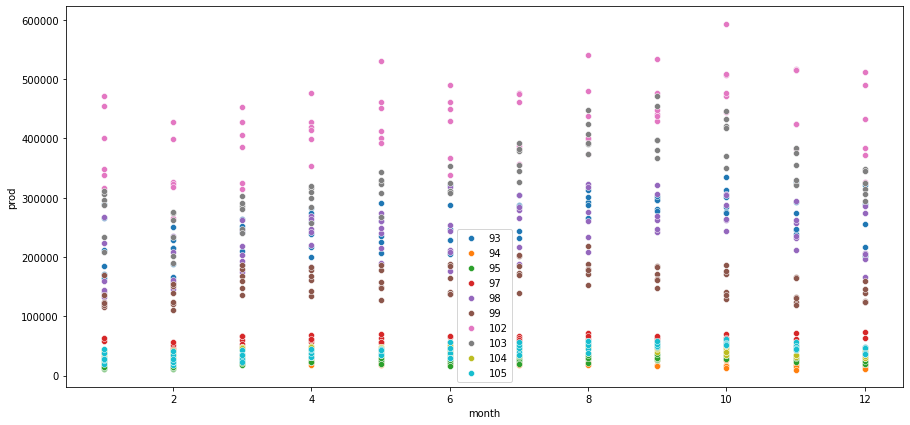

In [ ]:
#plot month vs prod
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.scatterplot(x='month', y='prod', data=nt)
sns.scatterplot(x='month', y='prod', data=nf)
sns.scatterplot(x='month', y='prod', data=nfi)
sns.scatterplot(x='month', y='prod', data=ns)
sns.scatterplot(x='month', y='prod', data=ne)
sns.scatterplot(x='month', y='prod', data=nn)
sns.scatterplot(x='month', y='prod', data=ot)
sns.scatterplot(x='month', y='prod', data=oth)
sns.scatterplot(x='month', y='prod', data=of)
sns.scatterplot(x='month', y='prod', data=ofi)
plt.legend(labels=df_plt.region_id.unique())

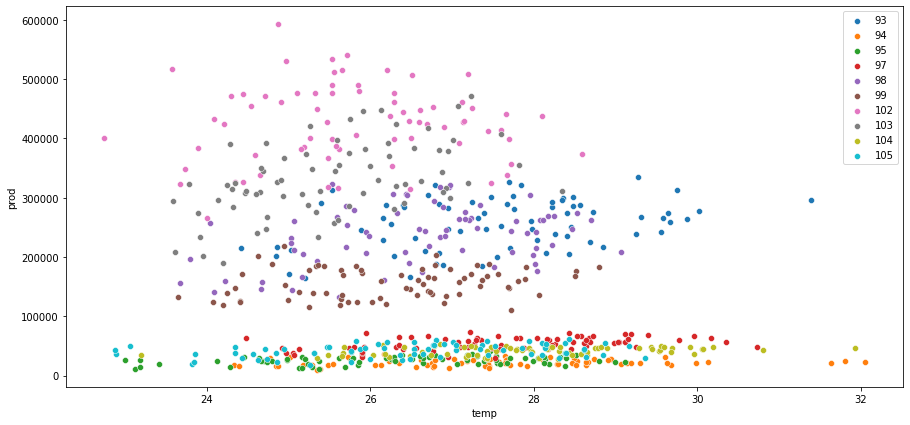

In [ ]:
#plot temp vs prod
plt.figure(figsize=(15, 7))
sns.scatterplot(x='temp', y='prod', data=nt)
sns.scatterplot(x='temp', y='prod', data=nf)
sns.scatterplot(x='temp', y='prod', data=nfi)
sns.scatterplot(x='temp', y='prod', data=ns)
sns.scatterplot(x='temp', y='prod', data=ne)
sns.scatterplot(x='temp', y='prod', data=nn)
sns.scatterplot(x='temp', y='prod', data=ot)
sns.scatterplot(x='temp', y='prod', data=oth)
sns.scatterplot(x='temp', y='prod', data=of)
sns.scatterplot(x='temp', y='prod', data=ofi)
plt.legend(labels=df_plt.region_id.unique())

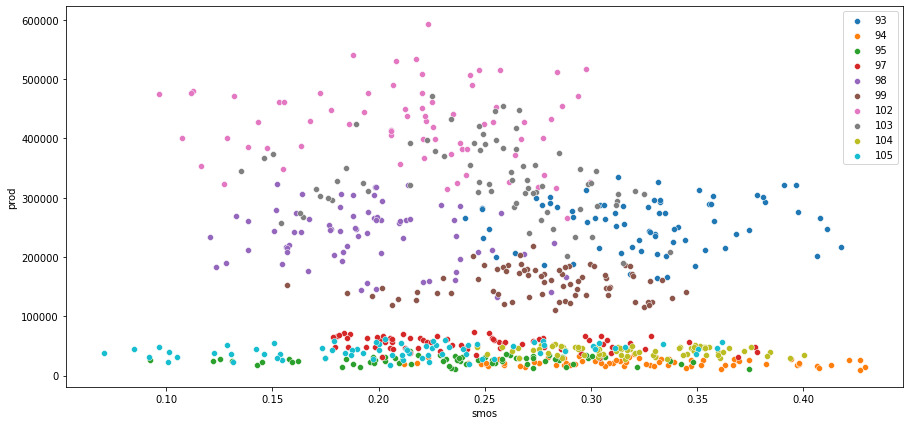

In [ ]:
#plot smos vs prod
plt.figure(figsize=(15, 7))
sns.scatterplot(x='smos', y='prod', data=nt)
sns.scatterplot(x='smos', y='prod', data=nf)
sns.scatterplot(x='smos', y='prod', data=nfi)
sns.scatterplot(x='smos', y='prod', data=ns)
sns.scatterplot(x='smos', y='prod', data=ne)
sns.scatterplot(x='smos', y='prod', data=nn)
sns.scatterplot(x='smos', y='prod', data=ot)
sns.scatterplot(x='smos', y='prod', data=oth)
sns.scatterplot(x='smos', y='prod', data=of)
sns.scatterplot(x='smos', y='prod', data=ofi)
plt.legend(labels=df_plt.region_id.unique())

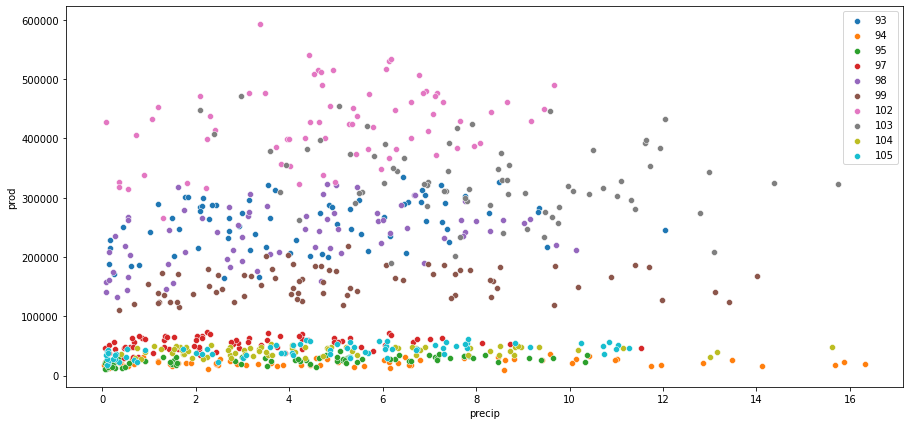

In [ ]:
#plot precip vs prod
plt.figure(figsize=(15, 7))
sns.scatterplot(x='precip', y='prod', data=nt)
sns.scatterplot(x='precip', y='prod', data=nf)
sns.scatterplot(x='precip', y='prod', data=nfi)
sns.scatterplot(x='precip', y='prod', data=ns)
sns.scatterplot(x='precip', y='prod', data=ne)
sns.scatterplot(x='precip', y='prod', data=nn)
sns.scatterplot(x='precip', y='prod', data=ot)
sns.scatterplot(x='precip', y='prod', data=oth)
sns.scatterplot(x='precip', y='prod', data=of)
sns.scatterplot(x='precip', y='prod', data=ofi)
plt.legend(labels=df_plt.region_id.unique())

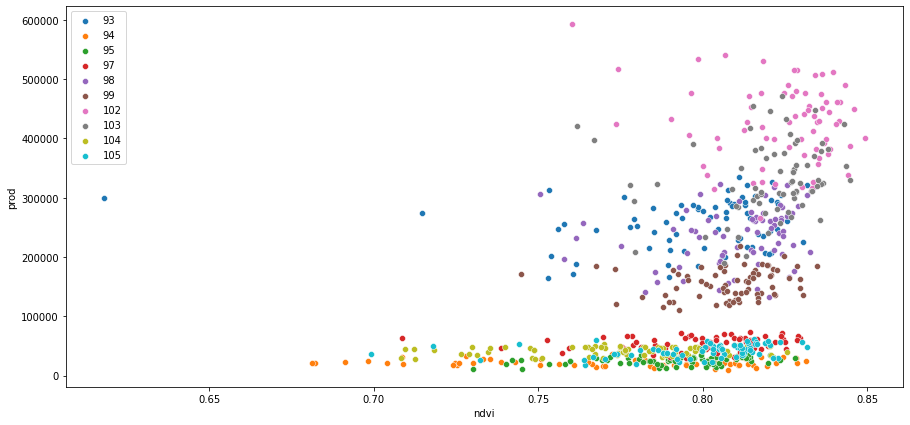

In [ ]:
#plot ndvi vs prod
plt.figure(figsize=(15, 7))
sns.scatterplot(x='ndvi', y='prod', data=nt)
sns.scatterplot(x='ndvi', y='prod', data=nf)
sns.scatterplot(x='ndvi', y='prod', data=nfi)
sns.scatterplot(x='ndvi', y='prod', data=ns)
sns.scatterplot(x='ndvi', y='prod', data=ne)
sns.scatterplot(x='ndvi', y='prod', data=nn)
sns.scatterplot(x='ndvi', y='prod', data=ot)
sns.scatterplot(x='ndvi', y='prod', data=oth)
sns.scatterplot(x='ndvi', y='prod', data=of)
sns.scatterplot(x='ndvi', y='prod', data=ofi)
plt.legend(labels=df_plt.region_id.unique())

From the above plots we can interpret that even the parameters are high in few regions the production is not very high. This means that there can be other parameter like the area of plantation in each region etc, which can effect the production.

For regions 94, 95, 97, 104, 105 the production never crossed 100000 even if the regions have the smiliar feature values as of high production regions. So there is a possibility that there are some other feature that determine the production.

# Model fitting and Evalutation on the split test data 

In [ ]:
df_final=df_fin.copy(deep=True)
df_final

,start_date,end_date,prod,region_id,temp,smos,precip,ndvi
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,25.003593,0.318552,0.260547,0.760691
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,26.807568,0.291452,0.150836,0.761635
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,26.954109,0.251969,1.636423,0.755956
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,26.948865,0.248915,9.357805,0.785057
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,25.405121,0.280602,7.340673,0.808383
...,...,...,...,...,...,...,...,...
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,27.424585,0.225784,4.442044,0.813537
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,27.940492,0.277477,6.090986,0.819784
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,27.048770,0.277670,7.131644,0.811309
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,24.715070,0.302014,10.996202,0.803192


In [ ]:
df_final.set_index("start_date", inplace =True)
df_final["month"] = df_final.index.month
df_final["year"]=df_final.index.year

In [ ]:
#One hot encoding the region_id and months as they are fixed values
df_final = pd.get_dummies(df_final,columns=['region_id','month'])
df_final

,end_date,prod,temp,smos,precip,ndvi,year,region_id_93,region_id_94,region_id_95,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
start_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,25.003593,0.318552,0.260547,0.760691,2015,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,26.807568,0.291452,0.150836,0.761635,2015,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,26.954109,0.251969,1.636423,0.755956,2015,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,26.948865,0.248915,9.357805,0.785057,2015,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,25.405121,0.280602,7.340673,0.808383,2015,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,27.424585,0.225784,4.442044,0.813537,2020,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,27.940492,0.277477,6.090986,0.819784,2020,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,27.048770,0.277670,7.131644,0.811309,2020,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_final.reset_index(inplace=True)
df_final.drop(['start_date','end_date','year'],axis=1,inplace=True)
df_final

,prod,temp,smos,precip,ndvi,region_id_93,region_id_94,region_id_95,region_id_97,region_id_98,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,171725,25.003593,0.318552,0.260547,0.760691,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,188325,26.807568,0.291452,0.150836,0.761635,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,247856,26.954109,0.251969,1.636423,0.755956,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,282791,26.948865,0.248915,9.357805,0.785057,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,291057,25.405121,0.280602,7.340673,0.808383,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,57818,27.424585,0.225784,4.442044,0.813537,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
716,57474,27.940492,0.277477,6.090986,0.819784,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
717,51821,27.048770,0.277670,7.131644,0.811309,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
718,44947,24.715070,0.302014,10.996202,0.803192,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Getting the features and dependent variable. Splitting the data into train and test
X=df_final.drop(['prod'],axis=1)
y=df_final['prod']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
#Fitting Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
sc=mean_absolute_percentage_error(y_test,y_pred)
rc=r2_score(y_test,y_pred)
print(sc)
print(rc)

0.2676021223566118
0.9451720916276385


In [ ]:
# Fitting Lasso and identifying best alpha
alpha=[0.05,0.1,0.25,0.5,1,2,5,10,15,20,30,50]
mape = []
r2=[]

for alfa in alpha:
    model = Lasso(alpha=alfa)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mape.append([alfa,mean_absolute_percentage_error(y_test,y_pred)])
    r2.append([alfa,r2_score(y_test,y_pred)])

print(mape)
print(r2)

[[0.05, 0.2676062899716852], [0.1, 0.2676104575867575], [0.25, 0.2676229604319703], [0.5, 0.26764379850732956], [1, 0.26768547465804615], [2, 0.26775279031856225], [5, 0.2679786495739859], [10, 0.268444126157504], [15, 0.26898994896113115], [20, 0.26964018940153484], [30, 0.26949928833278036], [50, 0.26706341664226396]]
[[0.05, 0.9451709166583965], [0.1, 0.945169740850999], [0.25, 0.9451662083998751], [0.5, 0.9451603042182293], [1, 0.9451484329932905], [2, 0.9451208823732546], [5, 0.9450411370605222], [10, 0.9449001135003695], [15, 0.9447494953541363], [20, 0.9445892171789219], [30, 0.9444522670079197], [50, 0.9443666811408394]]


In [ ]:
#Fitting Ridge and finding best alpha
alpha=[0.05,0.1,0.25,0.5,1,2,5,10,15,20,30,50]
mape = []
r2=[]

for alfa in alpha:
    model = Ridge(alpha=alfa)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mape.append([alfa,mean_absolute_percentage_error(y_test,y_pred)])
    r2.append([alfa,r2_score(y_test,y_pred)])

print(mape)
print(r2)

[[0.05, 0.2684986914639312], [0.1, 0.269204924690905], [0.25, 0.27012931259893036], [0.5, 0.27069006611403523], [1, 0.2706133326906739], [2, 0.2702948778084969], [5, 0.28346848891482535], [10, 0.36879637159436335], [15, 0.4649127145299709], [20, 0.5581472547421941], [30, 0.7100778557789957], [50, 0.9247592865390071]]
[[0.05, 0.9449810406719169], [0.1, 0.9448267716015011], [0.25, 0.9444689203767881], [0.5, 0.94398330246889], [1, 0.9430001443705581], [2, 0.9405278609719033], [5, 0.9292043521140545], [10, 0.9021528535388801], [15, 0.8704577672028919], [20, 0.8374624915559783], [30, 0.773264025478935], [50, 0.6630115256164002]]


In [ ]:
#Fitting a base Random Forest Model
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
sc=mean_absolute_percentage_error(y_test,y_pred)
rc=r2_score(y_test,y_pred)
print('mape:',sc)
print('r2: ',rc)

mape: 0.14322307340299423
r2:  0.9480384392975791


As Random Forest is performing well compared to linear models, we can continue to tune the paramters of random forest

In [ ]:
## Inital implementation of random search cv to identify the region of each parameter values

# from sklearn.model_selection import RandomizedSearchCV
# criterion=['squared_error', 'absolute_error', 'poisson']
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'criterion':criterion,
#                'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rfcv = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rfcv, param_distributions = random_grid, scoring='r2', n_iter = 150, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)
# print(rf_random.best_estimator_) ##RandomForestRegressor(criterion='absolute_error', max_depth=60, n_estimators=1788)
# print(rf_random.best_params_) ##{'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'absolute_error', 'bootstrap': True}

Fitting 3 folds for each of 150 candidates, totalling 450 fits
RandomForestRegressor(criterion='absolute_error', max_depth=60,
                      n_estimators=1788)
{'n_estimators': 1788, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'absolute_error', 'bootstrap': True}


In [ ]:
#Fitting model with the best parameters obtained
rf=RandomForestRegressor(criterion='squared_error',max_depth=60, n_estimators=1788,random_state=0,min_samples_split=2)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
sc=mean_absolute_percentage_error(y_test,y_pred)
rc=r2_score(y_test,y_pred)
print('mape:',sc)
print('r2: ',rc)

mape: 0.14246146629952097
r2:  0.9501530560834672


In [ ]:
##performing grid search to indentify the best values of parameters

# from sklearn.model_selection import GridSearchCV
# param_grid1 = {
#     #'bootstrap': [True,False],
#     'max_depth': [50,60,70,80,90],
#     #'max_features': ['sqrt'],
#     'min_samples_leaf': [1, 2, 3],
#     'min_samples_split': [1, 2, 3],
#     'n_estimators': [1300,1350,1400,1450,1500,1550,1600],
#     #'class_weight':['balanced','balanced_subsample']
# }
# rf2 = RandomForestRegressor(criterion='squared_error',bootstrap=True)
# grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid1,scoring='r2', 
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train,y_train)
# print(grid_search.best_params_) ##{'max_depth': 90, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1550}
# print(grid_search.best_estimator_) ##RandomForestRegressor(criterion='absolute_error', max_depth=90, min_samples_split=3, n_estimators=1550)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid1 = {
#     #'bootstrap': [True,False],
#     'max_depth': [int(x) for x in np.linspace(20, 30, num = 10)],
#     #'max_features': ['sqrt'],
#     #'min_samples_leaf': [1, 2, 3],
#     #'min_samples_split': [1, 2, 3],
#     'n_estimators': [int(x) for x in np.linspace(start = 1540, stop = 1560, num =20)],
#     #'class_weight':['balanced','balanced_subsample']
# }
# rf2 = RandomForestRegressor(criterion='squared_error',min_samples_split=3,bootstrap=True)
# grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid1,scoring='r2', 
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train,y_train)
# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'max_depth': 20, 'n_estimators': 1547}
RandomForestRegressor(max_depth=20, min_samples_split=3, n_estimators=1547)


In [ ]:
# Final model with tuned parameters
rf=RandomForestRegressor(criterion='squared_error', max_depth=23,
                      min_samples_split=3, n_estimators=1550,random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
sc=mean_absolute_percentage_error(y_test,y_pred)
rc=r2_score(y_test,y_pred)
print('mape:',sc)
print('r2: ',rc)

mape: 0.14265666241125427
r2:  0.9504432486401647


In [ ]:
#Fitting Xgboost model
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror',random_state=0).fit(X_train, y_train)

xgb_y_predict = xgb_model.predict(X_test)
xgb_score = mean_absolute_percentage_error(xgb_y_predict, y_test)
xgb_rc=r2_score(xgb_y_predict, y_test)
print(xgb_score)
print(xgb_rc)

0.15633135933714243
0.934144302188318


In [ ]:
#Tuning Xgboost parameters

# from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# max_depth = [int(x) for x in np.linspace(20, 60, num = 11)]
# colsample_bytree=[0.5,0.7,0.9,1]
# learning_rate=[0.05,0.15,0.1,0.2]
# min_child_weight=[1,3,5]
# subsample=[0.5,0.7,0.9]
# scale_pos_weight=[0.05,0.08,0.1,0.7,0.9]
# reg_lambda=[1.5,2,2.5]
# reg_alpha=[2,2.5,3]

# random_grid2 = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'colsample_bytree':colsample_bytree,
#                'learning_rate':learning_rate,
#                'min_child_weight': min_child_weight,
#                'subsample': subsample,
#                #'gamma':gamma,
#                'scale_pos_weight':scale_pos_weight}
# modrs = XGBRegressor(objective='reg:squarederror',random_state=0,eval_metric='rmse')
# mod_random = RandomizedSearchCV(estimator = modrs, param_distributions = random_grid2,error_score='raise', n_iter =200 , cv = 3,scoring='r2', verbose=2, random_state=42, n_jobs = -1)
# mod_random.fit(X_train, y_train)
# print(mod_random.best_params_)
# print(mod_random.best_estimator_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'subsample': 0.5, 'scale_pos_weight': 0.7, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 52, 'learning_rate': 0.05, 'colsample_bytree': 1}
XGBRegressor(eval_metric='rmse', learning_rate=0.05, max_depth=52,
             min_child_weight=3, n_estimators=200, objective='reg:squarederror',
             scale_pos_weight=0.7, subsample=0.5)


In [ ]:
xgb_model = XGBRegressor(eval_metric='rmse', learning_rate=0.05, max_depth=52,
             min_child_weight=3, n_estimators=200, objective='reg:squarederror',
              subsample=0.5).fit(X_train, y_train)

xgb_y_predict = xgb_model.predict(X_test)
xgb_score = mean_absolute_percentage_error(xgb_y_predict, y_test)
xgb_rc=r2_score(xgb_y_predict, y_test)
print(xgb_score)
print(xgb_rc)

0.1596748872018647
0.9485149822517979


In [ ]:
#Tuning Xgboost parameters

# from sklearn.model_selection import GridSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 150, stop = 300, num = 10)]
# max_depth = [int(x) for x in np.linspace(45, 60, num = 10)]
# #colsample_bytree=[0.65,0.7,0.75,0.8]
# learning_rate=[0.05,0.15,0.1,0.15]
# #min_child_weight=[1,3,5]
# #subsample=[0.5,0.7,0.9]
# #scale_pos_weight=[0.05,0.08,0.1,0.7,0.9]
# #reg_lambda=[1.5,2,2.5]
# #reg_alpha=[2,2.5,3]
# gr_grid2 = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                #'colsample_bytree':colsample_bytree,
#                'learning_rate':learning_rate}
#                #'min_child_weight': min_child_weight,
#                #'subsample': subsample,
#                #'reg_lambda':reg_lambda,
#                #'reg_alpha':reg_alpha,
#                #'scale_pos_weight':scale_pos_weight
# xgb2 = XGBRegressor(eval_metric='rmse', learning_rate=0.05, max_depth=52,
#              min_child_weight=3, n_estimators=200, objective='reg:squarederror',
#             subsample=0.5)
# grid_search = GridSearchCV(estimator = xgb2, param_grid = gr_grid2,scoring='r2', 
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train,y_train)
# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
{'learning_rate': 0.05, 'max_depth': 45, 'n_estimators': 150}
XGBRegressor(eval_metric='rmse', learning_rate=0.05, max_depth=45,
             min_child_weight=3, n_estimators=150, objective='reg:squarederror',
             subsample=0.5)


In [ ]:
#Final xgboost model with best parameters obtained
xgb_model = XGBRegressor(eval_metric='mae', learning_rate=0.1, max_depth=30,
             min_child_weight=3, n_estimators=237, objective='reg:squarederror',
              subsample=0.5).fit(X_train, y_train)

xgb_y_predict = xgb_model.predict(X_test)
xgb_score = mean_absolute_percentage_error(xgb_y_predict, y_test)
xgb_rc=r2_score(xgb_y_predict, y_test)
print(xgb_score)
print(xgb_rc)

0.17601608744390623
0.9517808595841276


Applying the stacking regressor as we can see from the best model of random forest has comparitively lower r2 score than xgb and random forest has lower mape score compared to xgboost. So stacking can imporve r2 score and reduce mape.

In [ ]:
from sklearn.ensemble import StackingRegressor
level0=[]
level0.append(('rf',RandomForestRegressor(criterion='squared_error', max_depth=23,min_samples_split=3, n_estimators=1550,random_state=0)))
level0.append(('xgb',XGBRegressor(eval_metric='mae', learning_rate=0.1, max_depth=30,min_child_weight=3, n_estimators=237, objective='reg:squarederror',subsample=0.5)))
level1=Ridge()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
sc=mean_absolute_percentage_error(y_test,y_pred)
rc=r2_score(y_test,y_pred)
print('mape:',sc)
print('r2: ',rc)

mape: 0.1407590390290634
r2:  0.9542975720167851


In [ ]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import RidgeCV,LassoCV

# level0=[]
# level0.append(('rf',RandomForestRegressor(criterion='squared_error', max_depth=23,min_samples_split=3, n_estimators=1550,random_state=0)))
# level0.append(('xgb',XGBRegressor(eval_metric='mae', learning_rate=0.1, max_depth=30,min_child_weight=3, n_estimators=237, objective='reg:squarederror',subsample=0.5)))
# alpha=[0.05,0.1,0.25,0.5,1,2,5,10,15,20,30,50]
# for alfa in alpha:
#   level1=RidgeCV(alphas=alfa)
#   model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
#   model.fit(X_train, y_train)
#   y_pred=model.predict(X_test)
#   sc=mean_absolute_percentage_error(y_test,y_pred)
#   rc=r2_score(y_test,y_pred)
#   print('mape:',sc)
#   print('r2: ',rc)

mape: 0.44427673298574033
r2:  0.9125741152832223
mape: 0.22208206322123245
r2:  0.9483766023755728
mape: 0.17083215314090697
r2:  0.9525277622121147
mape: 0.14636725226268343
r2:  0.9541353629480694
mape: 0.14205983837402966
r2:  0.9543399970554688
mape: 0.14110959063831408
r2:  0.9543479540776434
mape: 0.1408730221229249
r2:  0.9543270197034606
mape: 0.14081420985638013
r2:  0.954313262065301
mape: 0.14079145179462524
r2:  0.9543071073920897
mape: 0.1407846096127927
r2:  0.9543051704426738
mape: 0.1407732508359876
r2:  0.9543018596350635
mape: 0.1407706807829684
r2:  0.9543010992238854


#Traning the stacking model on whole data set

In [ ]:
df_pred

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,NaN,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,NaN,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,NaN,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,NaN,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,NaN,93
...,...,...,...,...
115,2021-08-01T00:00:00.000Z,2021-08-31T00:00:00.000Z,NaN,105
116,2021-09-01T00:00:00.000Z,2021-09-30T00:00:00.000Z,NaN,105
117,2021-10-01T00:00:00.000Z,2021-10-31T00:00:00.000Z,NaN,105
118,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,NaN,105


In [ ]:
df_pred.start_date=pd.to_datetime(df_pred.start_date)
df_pred.end_date=pd.to_datetime(df_pred.end_date)

Preparing the data for the trained model to predict the prod values for 2021

In [ ]:
l=df_dt['region_id'].unique()
df_dt_newf=pd.DataFrame()
for i in l:
    a=pd.DataFrame(df_dt.temp[(df_dt['region_id']==i)&(df_dt.index.year==2021)].resample(rule='M').mean())
    a['region_id']=df_dt.region_id[(df_dt['region_id']==i)].resample(rule='M').min()
    df_dt_newf=pd.concat([df_dt_newf,a])
df_dt_newf.reset_index(inplace=True)
df_dt_newf.rename(columns={"start_date": "end_date"},inplace=True)
df_fpred=pd.merge(df_pred,df_dt_newf,how="left",on=['end_date','region_id'])
df_fpred

,start_date,end_date,prod,region_id,temp
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93,25.093076
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93,26.897011
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93,28.251589
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93,27.924892
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93,26.930918
...,...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105,26.764261
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105,26.673888
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105,26.967615
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105,25.322988


In [ ]:
l=df_dsm['region_id'].unique()
df_dsm_newf=pd.DataFrame()
for i in l:
    a=pd.DataFrame(df_dsm.smos[(df_dsm['region_id']==i)&(df_dsm.index.year==2021)].resample(rule='M').mean())
    a['region_id']=df_dsm.region_id[(df_dsm['region_id']==i)].resample(rule='M').min()
    df_dsm_newf=pd.concat([df_dsm_newf,a])
df_dsm_newf.reset_index(inplace=True)
df_dsm_newf.rename(columns={"start_date": "end_date"},inplace=True)
df_fpred=pd.merge(df_fpred,df_dsm_newf,how="left",on=['end_date','region_id'])
df_fpred

,start_date,end_date,prod,region_id,temp,smos
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93,25.093076,0.430121
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93,26.897011,0.376494
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93,28.251589,0.321724
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93,27.924892,0.372365
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93,26.930918,0.350557
...,...,...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105,26.764261,0.267808
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105,26.673888,0.251307
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105,26.967615,0.277053
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105,25.322988,0.397742


In [ ]:
l=df_dprecip['region_id'].unique()
df_dprecip_newf=pd.DataFrame()
for i in l:
    a=pd.DataFrame(df_dprecip.precip[(df_dprecip['region_id']==i)&(df_dprecip.index.year==2021)].resample(rule='M').median())
    a['region_id']=df_dprecip.region_id[(df_dprecip['region_id']==i)].resample(rule='M').min()
    df_dprecip_newf=pd.concat([df_dprecip_newf,a])
df_dprecip_newf.reset_index(inplace=True)
df_dprecip_newf.rename(columns={"start_date": "end_date"},inplace=True)
df_fpred=pd.merge(df_fpred,df_dprecip_newf,how="left",on=['end_date','region_id'])
df_fpred

,start_date,end_date,prod,region_id,temp,smos,precip
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93,25.093076,0.430121,2.299993
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93,26.897011,0.376494,0.055563
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93,28.251589,0.321724,4.082503
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93,27.924892,0.372365,5.306927
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93,26.930918,0.350557,6.499226
...,...,...,...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105,26.764261,0.267808,7.359016
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105,26.673888,0.251307,7.150780
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105,26.967615,0.277053,5.417624
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105,25.322988,0.397742,11.368894


In [ ]:
l=df_NDVI['region_id'].unique()
df_NDVI_newf=pd.DataFrame()
for i in l:
    a=pd.DataFrame(df_NDVI.ndvi[(df_NDVI['region_id']==i)&(df_NDVI.index.year==2021)].resample(rule='M').median())
    a['region_id']=df_NDVI.region_id[(df_NDVI['region_id']==i)].resample(rule='M').min()
    df_NDVI_newf=pd.concat([df_NDVI_newf,a])
df_NDVI_newf.reset_index(inplace=True)
df_NDVI_newf.rename(columns={"start_date": "end_date"},inplace=True)
df_fpred=pd.merge(df_fpred,df_NDVI_newf,how="left",on=['end_date','region_id'])
df_fpred

,start_date,end_date,prod,region_id,temp,smos,precip,ndvi
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93,25.093076,0.430121,2.299993,0.792559
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93,26.897011,0.376494,0.055563,0.762286
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93,28.251589,0.321724,4.082503,0.785618
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93,27.924892,0.372365,5.306927,0.817629
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93,26.930918,0.350557,6.499226,0.823099
...,...,...,...,...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105,26.764261,0.267808,7.359016,0.811309
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105,26.673888,0.251307,7.150780,0.812126
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105,26.967615,0.277053,5.417624,0.802367
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105,25.322988,0.397742,11.368894,0.801214


In [ ]:
df_finalpre=df_fpred.copy(deep=True)
df_finalpre.set_index("start_date", inplace =True)
df_finalpre["month"] = df_finalpre.index.month
df_finalpre["year"]=df_finalpre.index.year
df_finalpre = pd.get_dummies(df_finalpre,columns=['region_id','month'])
df_finalpre

,end_date,prod,temp,smos,precip,ndvi,year,region_id_93,region_id_94,region_id_95,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
start_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,25.093076,0.430121,2.299993,0.792559,2021,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,26.897011,0.376494,0.055563,0.762286,2021,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,28.251589,0.321724,4.082503,0.785618,2021,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,27.924892,0.372365,5.306927,0.817629,2021,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,26.930918,0.350557,6.499226,0.823099,2021,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,26.764261,0.267808,7.359016,0.811309,2021,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,26.673888,0.251307,7.150780,0.812126,2021,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,26.967615,0.277053,5.417624,0.802367,2021,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_finalpre.reset_index(inplace=True)
df_finalpre.drop(['start_date','end_date','year','prod'],axis=1,inplace=True)
df_finalpre

,temp,smos,precip,ndvi,region_id_93,region_id_94,region_id_95,region_id_97,region_id_98,region_id_99,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,25.093076,0.430121,2.299993,0.792559,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.897011,0.376494,0.055563,0.762286,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.251589,0.321724,4.082503,0.785618,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27.924892,0.372365,5.306927,0.817629,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,26.930918,0.350557,6.499226,0.823099,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,26.764261,0.267808,7.359016,0.811309,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
116,26.673888,0.251307,7.150780,0.812126,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
117,26.967615,0.277053,5.417624,0.802367,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
118,25.322988,0.397742,11.368894,0.801214,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_pred=df_finalpre

In [ ]:
from sklearn.utils import shuffle
X_final=shuffle(X,random_state=42)
y_final=shuffle(y,random_state=42)

In [ ]:
## Training stacking regressor on whole data set

levelf0=[]
levelf0.append(('rff',RandomForestRegressor(criterion='squared_error', max_depth=23,min_samples_split=3, n_estimators=1550,random_state=0)))
levelf0.append(('xgbf',XGBRegressor(eval_metric='mae', learning_rate=0.1, max_depth=30,min_child_weight=3, n_estimators=237, objective='reg:squarederror',subsample=0.5)))
levelf1=Ridge()
modelf = StackingRegressor(estimators=levelf0, final_estimator=levelf1, cv=5)
modelf.fit(X_final, y_final)

StackingRegressor(cv=5,
                  estimators=[('rff',
                               RandomForestRegressor(max_depth=23,
                                                     min_samples_split=3,
                                                     n_estimators=1550,
                                                     random_state=0)),
                              ('xgbf',
                               XGBRegressor(eval_metric='mae', max_depth=30,
                                            min_child_weight=3,
                                            n_estimators=237,
                                            objective='reg:squarederror',
                                            subsample=0.5))],
                  final_estimator=Ridge())

In [ ]:
#Checking the model performance
y_pred=modelf.predict(X)
sc=mean_absolute_percentage_error(y,y_pred)
rc=r2_score(y,y_pred)
print('mape:',sc)
print('r2: ',rc)

mape: 0.03070574497768504
r2:  0.9979307016582188


In [ ]:
#predicting the production values for 2021
prod_pred=modelf.predict(X_pred)
prod_pred

array([203659.38298058, 199444.29474512, 252519.40586518, 244400.60919362,
       264355.13134119, 255797.10740359, 249654.09957298, 275371.50858144,
       293594.47816408, 278303.96904548, 277168.20996512, 260758.76127762,
        20817.49749188,  19991.64123038,  22459.62132696,  25901.37120185,
        19546.71299343,  16841.57573868,  19585.76551377,  35574.10700812,
        24825.9072858 ,  18068.91972419,  13743.99832514,  14401.33546318,
        20859.95455071,  17538.16523114,  22664.92697556,  30704.16267951,
        27929.57620813,  31718.31568285,  26000.76036091,  32124.72415662,
        32401.65508822,  27343.75389137,  26630.47890747,  19946.72303249,
        46829.09960975,  40770.59464868,  54011.55829374,  58407.29376636,
        65069.76507837,  61749.01832829,  61396.76603752,  74718.10260311,
        53346.33839942,  62301.39030048,  58357.37983866,  49317.21926616,
       170707.83004146, 151592.08494343, 230307.08302652, 259750.52258174,
       285921.85607027, 2

In [ ]:
df_finpre=df_fpred.copy(deep=True)
df_finpre

,start_date,end_date,prod,region_id,temp,smos,precip,ndvi
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93,25.093076,0.430121,2.299993,0.792559
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93,26.897011,0.376494,0.055563,0.762286
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93,28.251589,0.321724,4.082503,0.785618
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93,27.924892,0.372365,5.306927,0.817629
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93,26.930918,0.350557,6.499226,0.823099
...,...,...,...,...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105,26.764261,0.267808,7.359016,0.811309
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105,26.673888,0.251307,7.150780,0.812126
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105,26.967615,0.277053,5.417624,0.802367
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105,25.322988,0.397742,11.368894,0.801214


In [ ]:
#Adding the predicted prod values to data frame
df_finpre['prod']=prod_pred
df_finpre

,start_date,end_date,prod,region_id,temp,smos,precip,ndvi
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,203659.382981,93,25.093076,0.430121,2.299993,0.792559
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,199444.294745,93,26.897011,0.376494,0.055563,0.762286
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,252519.405865,93,28.251589,0.321724,4.082503,0.785618
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,244400.609194,93,27.924892,0.372365,5.306927,0.817629
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,264355.131341,93,26.930918,0.350557,6.499226,0.823099
...,...,...,...,...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,55691.875298,105,26.764261,0.267808,7.359016,0.811309
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,53320.669832,105,26.673888,0.251307,7.150780,0.812126
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,51680.429069,105,26.967615,0.277053,5.417624,0.802367
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,43551.216516,105,25.322988,0.397742,11.368894,0.801214


In [ ]:
#Preparing the final data frame 
df_finpre.drop(['temp','smos','precip','ndvi'],axis=1,inplace=True)
df_finpre

,start_date,end_date,prod,region_id
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,203659.382981,93
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,199444.294745,93
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,252519.405865,93
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,244400.609194,93
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,264355.131341,93
...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,55691.875298,105
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,53320.669832,105
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,51680.429069,105
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,43551.216516,105


In [ ]:
#Converting dataframe to csv file
df_finpre.to_csv('amarendrakancharla15@gmail.com.csv', index=False)